# House Price Model using Ridge and Lasso Regression

#### The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation and EDA
- Model building


### Importing Necessary Libraries

In [122]:
import pandas as pd
import numpy as np

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


# Extra
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None) #to display all columns
pd.set_option('display.max_rows',None) #to display all rows

from sklearn.model_selection import train_test_split #for splitting data set into train and test
from sklearn.preprocessing import MinMaxScaler #for scaling data

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score,mean_squared_error


### Data understanding and exploration

In [129]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [124]:
df.shape

(1460, 81)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Cleaning

In [126]:
#df.isnull().sum() #missing value check
(df.isnull().sum()*100)/len(df)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [130]:
#Columns with missing values or values that are None in data dictionary and are not important   
miss_val=['MiscFeature','PoolQC','Fence','Alley','FireplaceQu']
#dropping columns which has missing values also of not much importance
df.drop(axis=1, labels=miss_val ,inplace=True)

In [131]:
#function for imputing missing values 
def imput_Ms_Val(data_frame,col,value):
    data_frame[col].fillna(value, inplace = True)

In [132]:
imput_Ms_Val(df,'BsmtQual','None')#imputing NA values as None no basement as per data dictionary
imput_Ms_Val(df,'BsmtCond','None')#imputing NA values as None no basement as per data dictionary
imput_Ms_Val(df,'BsmtExposure','None')#imputing NA values as None no basement as per data dictionary
imput_Ms_Val(df,'BsmtFinType1','None')#imputing NA values as None no basement as per data dictionary
imput_Ms_Val(df,'BsmtFinType2','None')#imputing NA values as None no basement as per data dictionary
imput_Ms_Val(df,'GarageType','None')#imputing NA values as None no Garage as per data dictionary
imput_Ms_Val(df,'GarageQual','None')#imputing NA values as None no Garage as per data dictionary
imput_Ms_Val(df,'GarageCond','None')#imputing NA values as None no Garage as per data dictionary
imput_Ms_Val(df,'GarageFinish','None')#imputing NA values as None no Garage as per data dictionary
imput_Ms_Val(df,'MasVnrType','None')#imputing NA values as None no Garage as per data dictionary
imput_Ms_Val(df,'Electrical','None')#imputing NA values as None no Garage as per data dictionary


In [133]:
df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["GarageYrBlt"].fillna('0', inplace=True)#imputing year as zero as no Garage is there.

In [134]:
duplicateRow=len(df[df.duplicated()])
print("Total Duplicated Rows Are",round(duplicateRow,1))

Total Duplicated Rows Are 0


In [135]:
null_unique = pd.DataFrame()
null_unique['nulls'] = pd.Series(df.isnull().sum())
null_unique['unique'] = pd.Series(df.nunique())
null_unique

,nulls,unique
Id,0,1460
MSSubClass,0,15
MSZoning,0,5
LotFrontage,0,115
LotArea,0,1073
Street,0,2
LotShape,0,4
LandContour,0,4
Utilities,0,2
LotConfig,0,5


### Data Preparation

In [136]:
df['Prop_age']=df['YrSold']-df['YearBuilt']#calculating age of property

In [137]:
extra_yrcols=['YearBuilt','YearRemodAdd','MoSold','YrSold']
# these colums are not requires afte the age of property is calculated

In [138]:
df.drop(axis=1, labels=extra_yrcols,inplace=True )

In [139]:
df.shape

(1460, 73)

In [140]:
#checking categorical columns for feature that dont add value to model,whose single value is more then 80%
for c in df.columns:
    if df[c].dtype == np.object :
        print(c)
        print(df[c].value_counts(normalize=True))

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64
Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.

In [141]:
#deleting rows which is not important or unique or large percentage of single value
extra_col_NI=['Id','Street', 'LandContour', 'Utilities', 'LandSlope','Condition1', 'Condition2','RoofStyle', 'RoofMatl', 
              'BsmtCond','Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition']

In [142]:
df.drop(axis=1,labels=extra_col_NI,inplace=True)

In [143]:
df.shape

(1460, 51)

In [144]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Prop_age
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,208500,5
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,181500,31
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,223500,7
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,140000,91
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,250000,8


In [145]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Prop_age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.199658,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,36.547945
std,42.300571,22.431902,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.250152
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,8.000000
50%,50.000000,70.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,35.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,54.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,136.000000


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  Exterior1st    1460 non-null   object 
 11  Exterior2nd    1460 non-null   object 
 12  MasVnrType     1460 non-null   object 
 13  MasVnrArea     1460 non-null   float64
 14  ExterQual      1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  BsmtQual       1460 non-null   object 
 17  BsmtExposure   1460 non-null   object 
 18  BsmtFinT

### seperating categorical and continous columns

In [147]:
#Get all categorical type columns
cat_col = []
for c in df.columns:
    if df[c].dtype == np.object:
        cat_col.append(c)
print(cat_col)

['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish']


In [148]:
#Get all categorical type columns
num_col = []
for c in df.columns:
    if df[c].dtype != np.object:
        num_col.append(c)
print(num_col)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Prop_age']


In [149]:
cat_col_2=['OverallQual','OverallCond'] #columns whoose value are numeric but it is categorical columns.

In [150]:
cat_col_F=cat_col + cat_col_2 

In [151]:
num_col.remove('OverallQual')#deleting categorical columns from numeric list

In [152]:
num_col.remove('OverallCond')

In [153]:
print(num_col)

['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Prop_age']


### EDA

#### Univariate Analysis

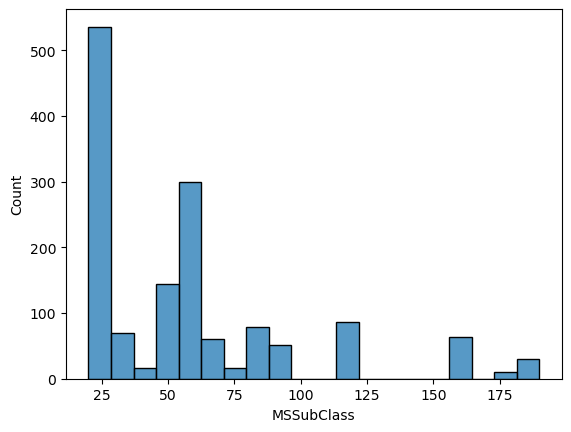

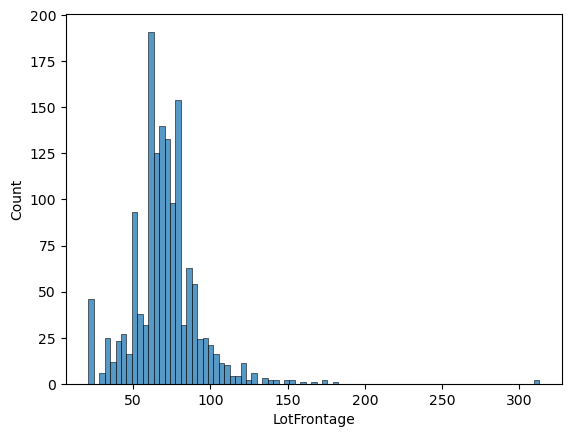

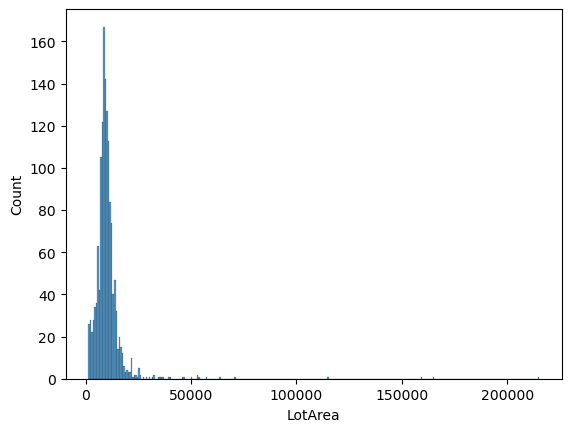

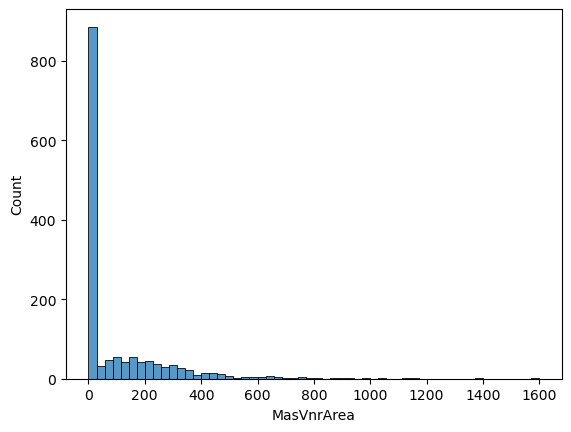

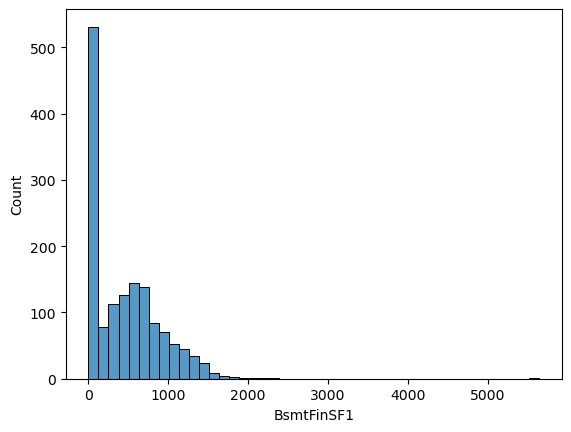

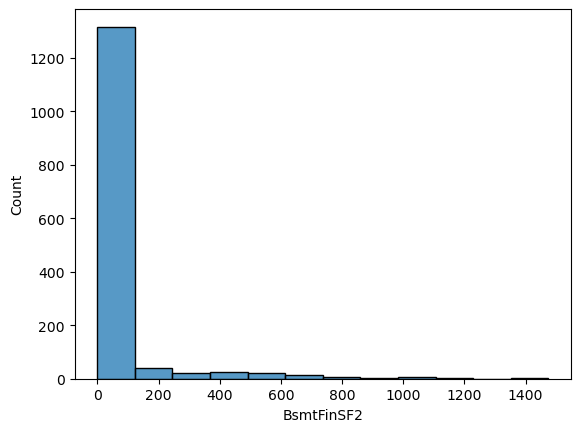

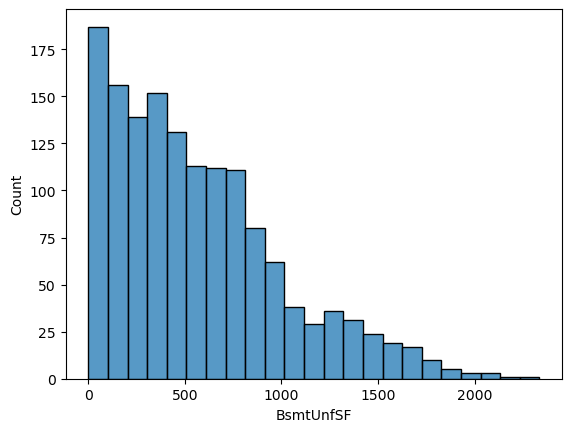

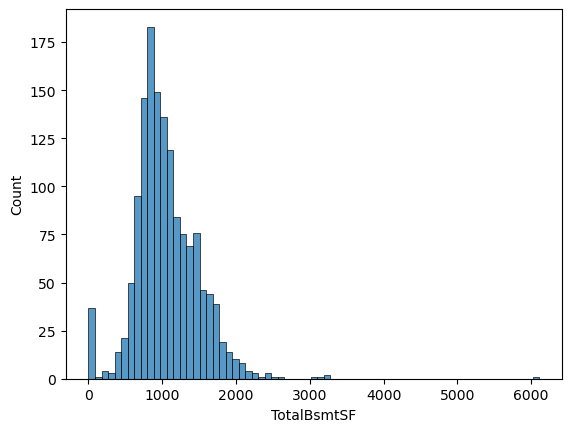

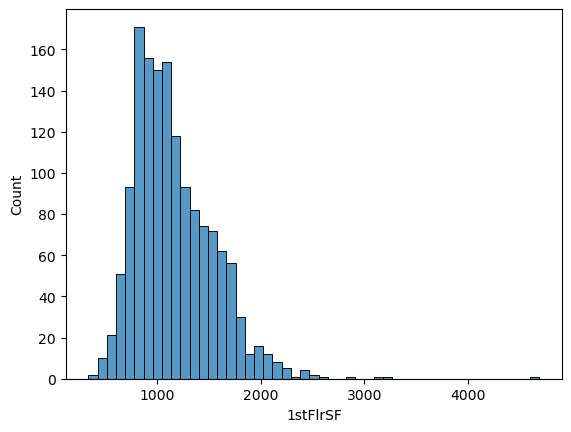

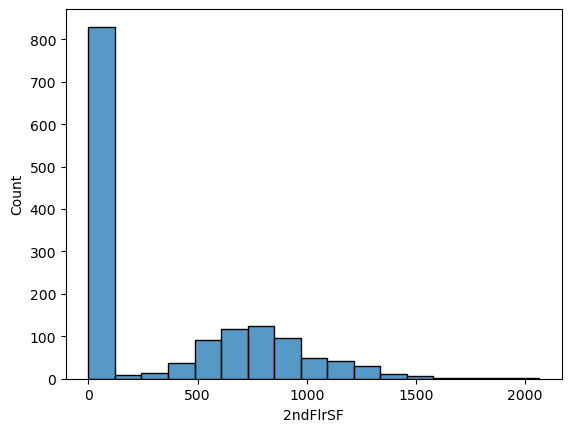

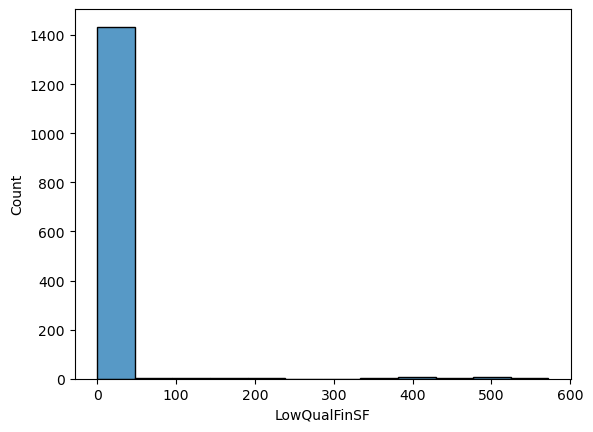

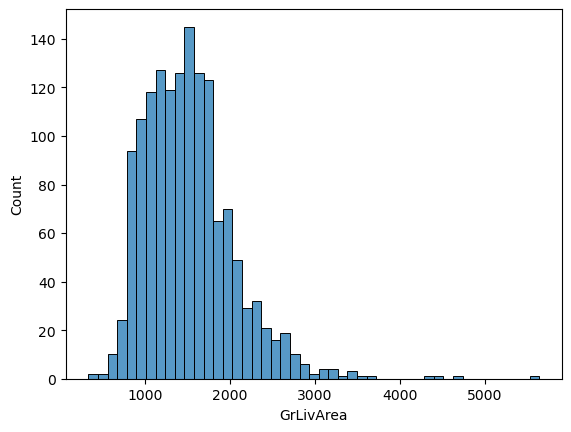

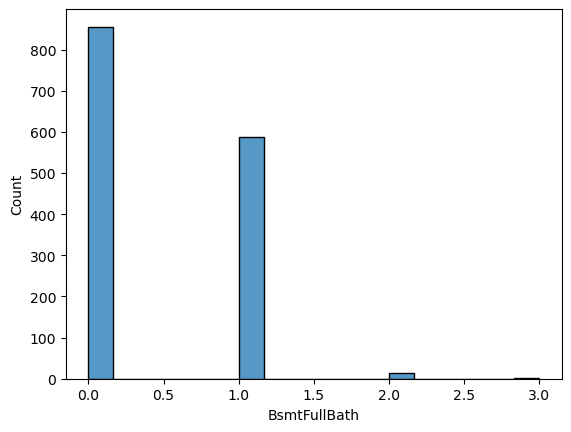

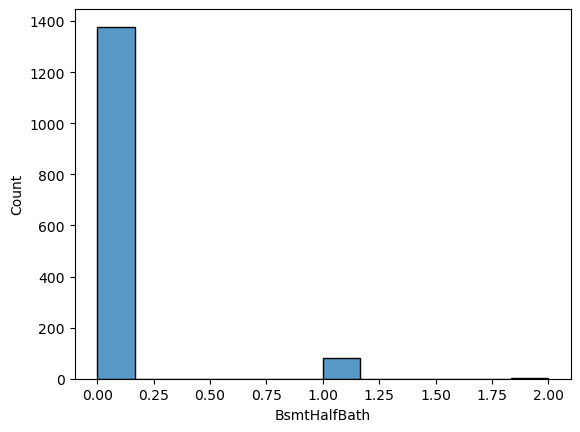

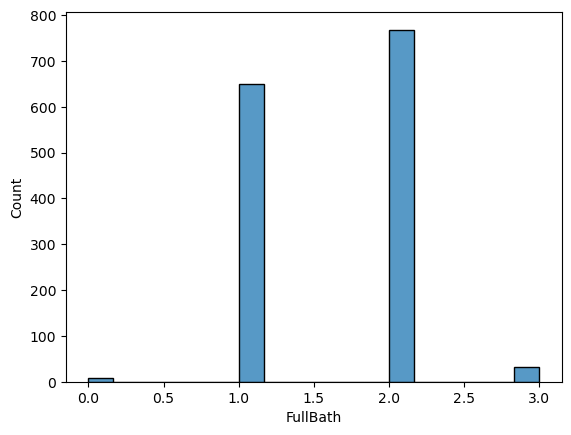

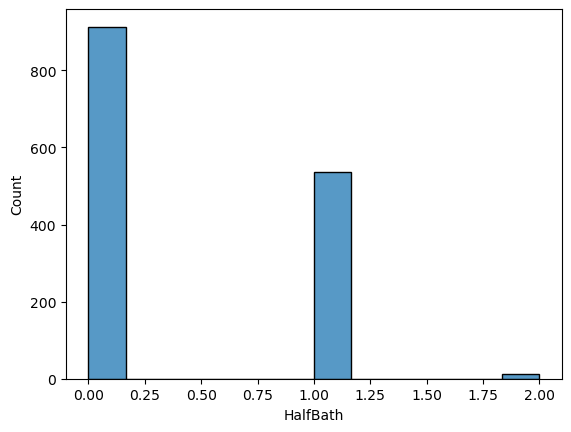

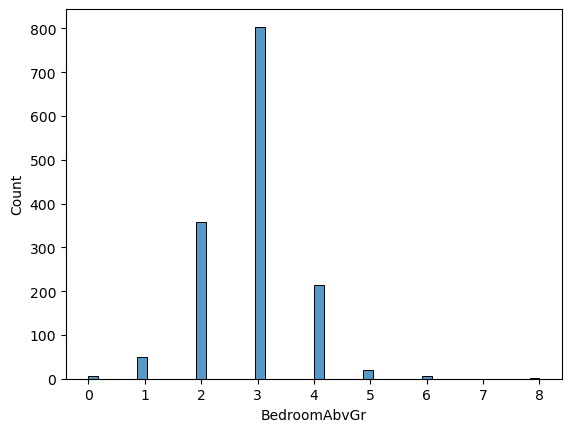

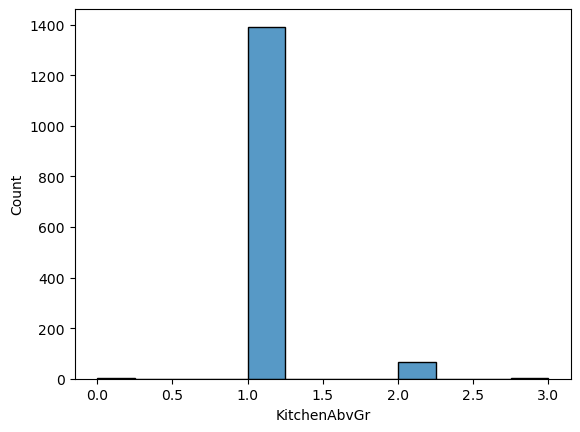

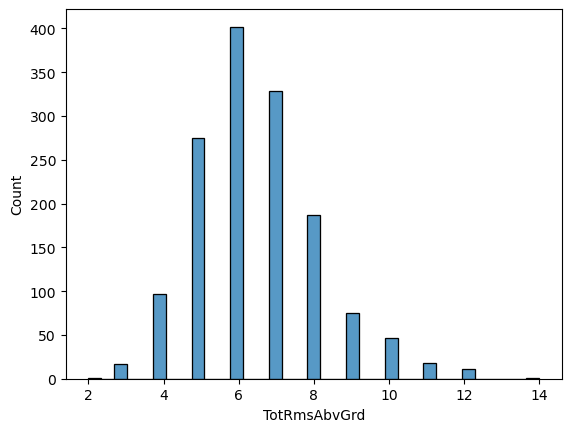

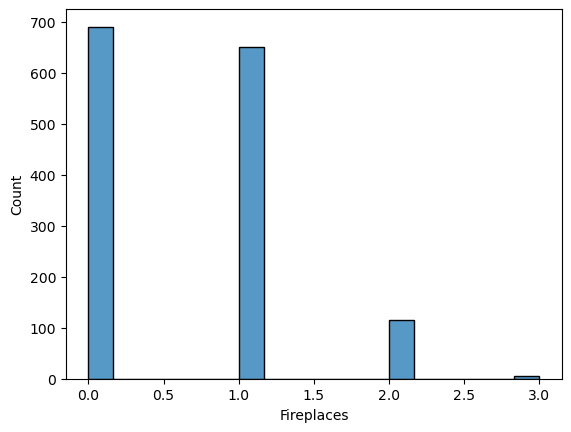

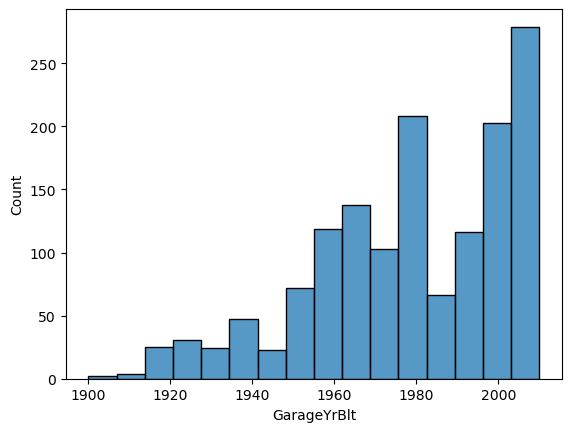

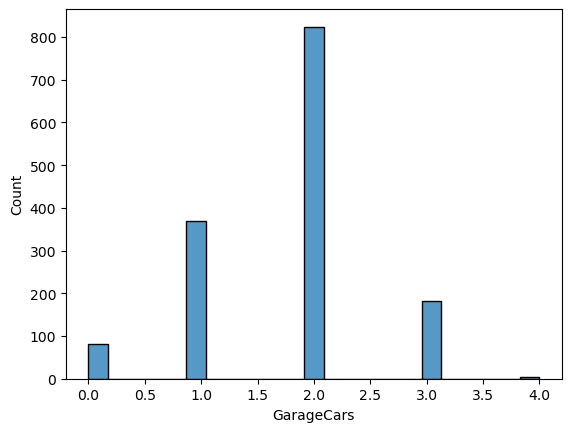

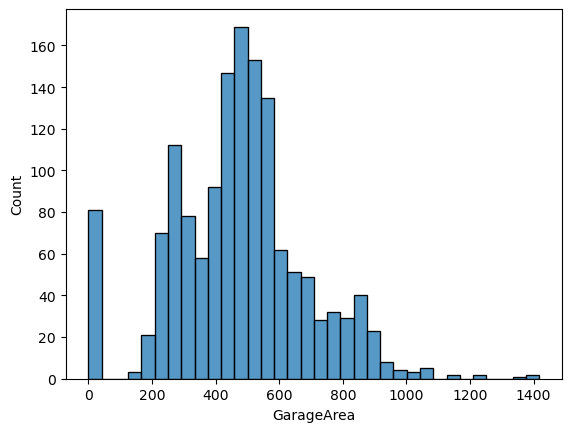

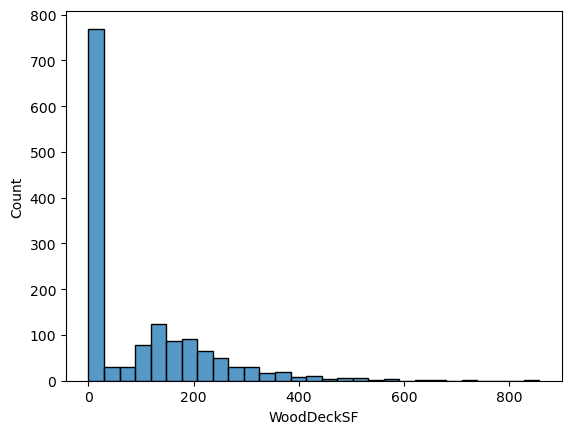

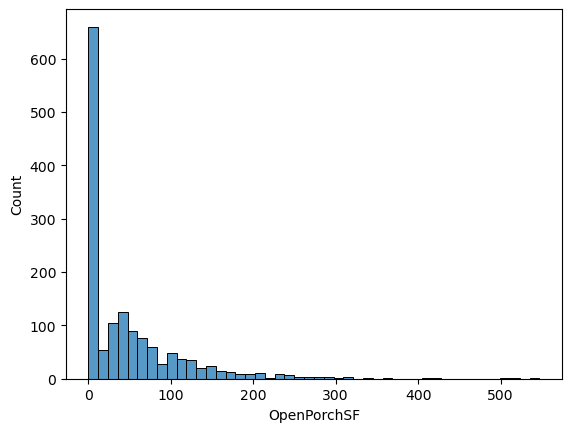

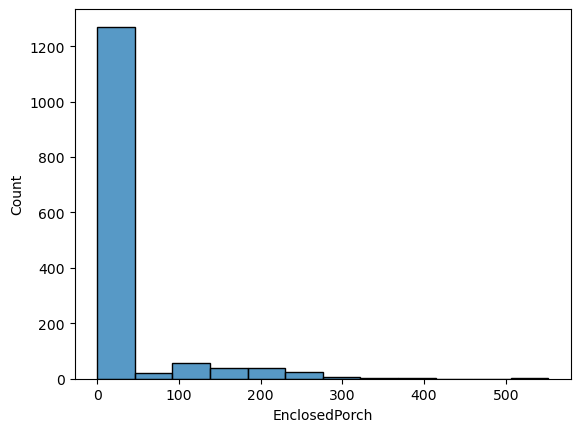

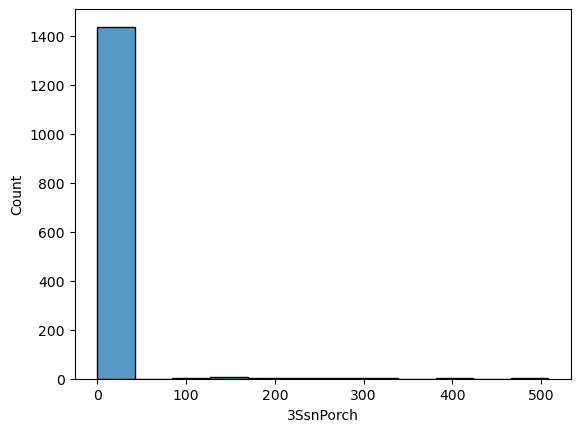

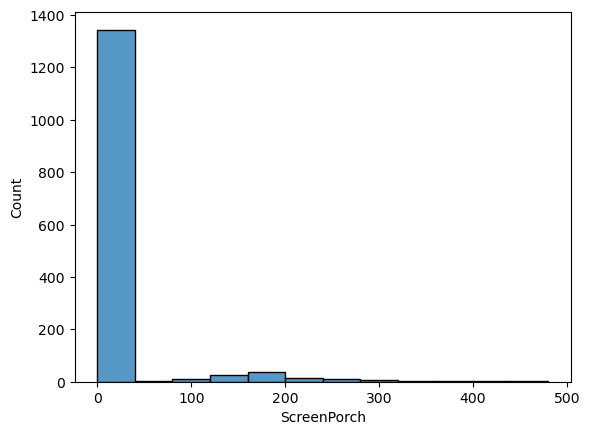

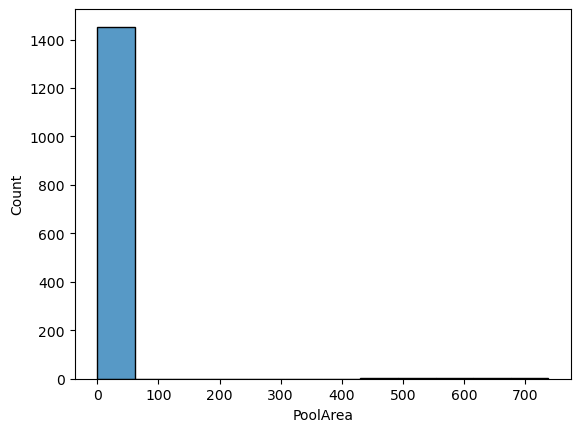

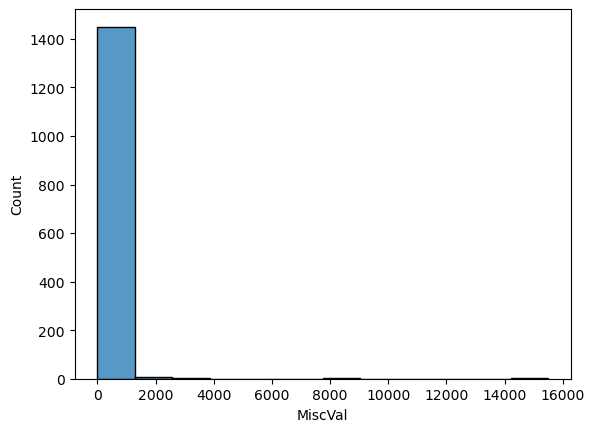

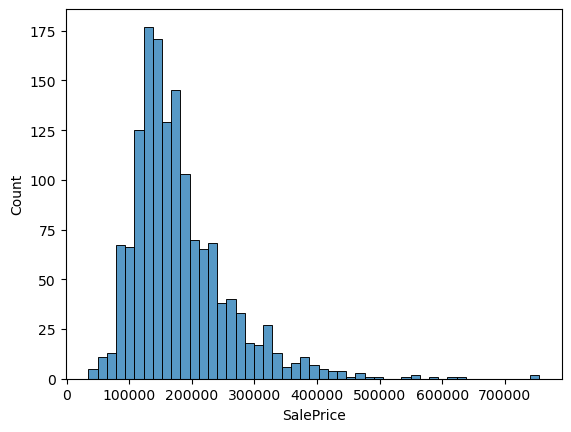

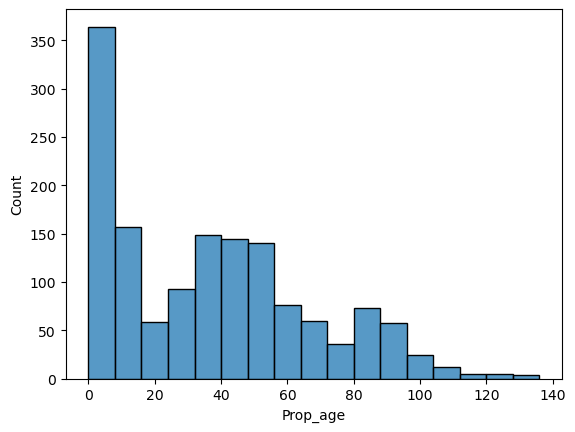

In [154]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))
for col in num_col:
    sns.histplot(x=df[col])
    plt.show()

In [155]:
# Some numeric columns have mostly single value so these columns could be deleted
extra_uni=['LowQualFinSF','BsmtFinSF2','BsmtHalfBath','KitchenAbvGr',
           'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [156]:
for i in extra_uni :
        print(df[i].value_counts())

0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64
0       1293
180        5
374        3
551        2
147        2
294        2
391        2
539        2
96         2
480        2
182        2
468        2
117        2
64         2
290        2
469        2
279        2
287        2
93         2
712        2
41         2
149        1
1061       1
466        1
396        1
354        1
215        1
841        1
273        1
465        1
400        1
682        1
557        1
230        1
193        1
411        1
634        1
324        1
486        1
500        1
823        1
435        1
1085       1
345        1
764        1
377        1
128        1
630        1
127        1
106        1
791        1
240        1
276

In [157]:
# drop numeric columns which has biased values and not used in predictive
df.drop(axis=1,labels=extra_uni,inplace=True)

In [158]:
df.shape

(1460, 42)

In [159]:
print(num_col)

['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Prop_age']


In [160]:
num_col_updated=['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 
                 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea',
                 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','TotRmsAbvGrd',
                 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                 'SalePrice', 'Prop_age']

####  Univariate Analysis of Categorical Data

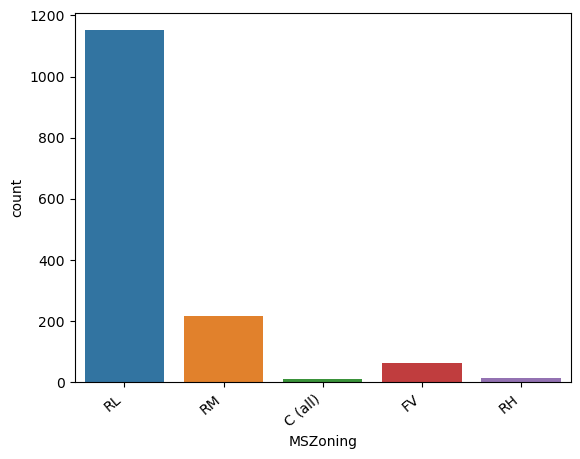

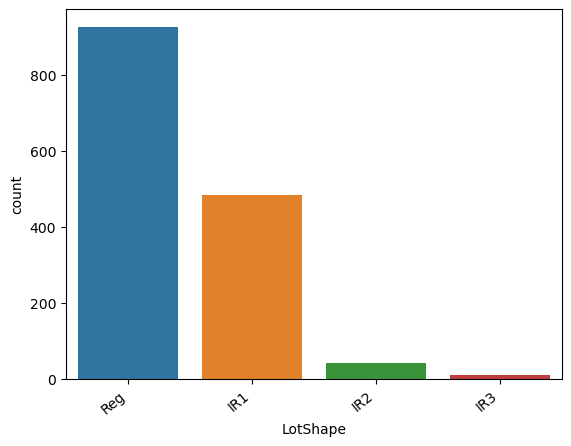

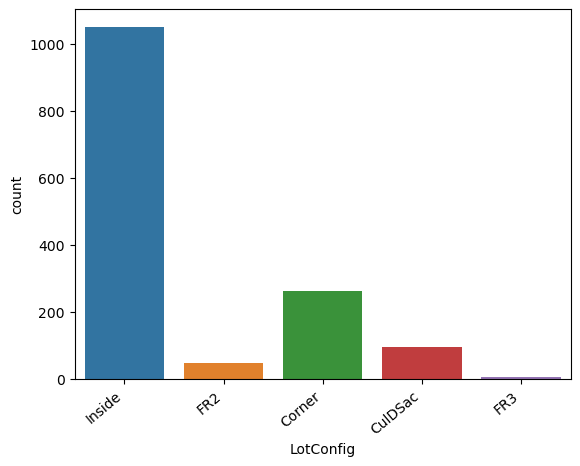

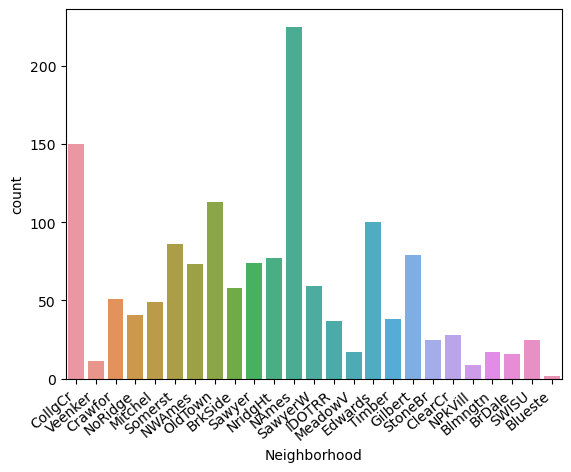

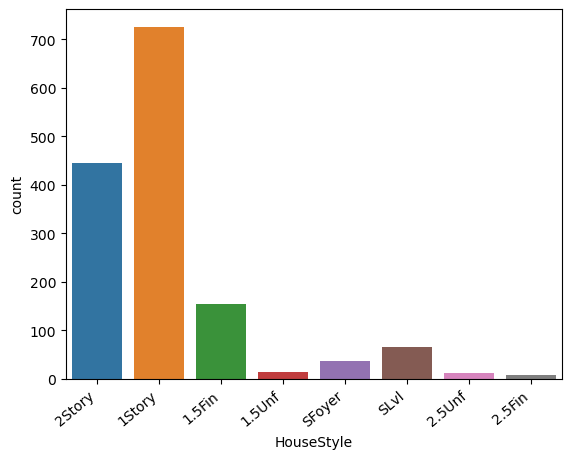

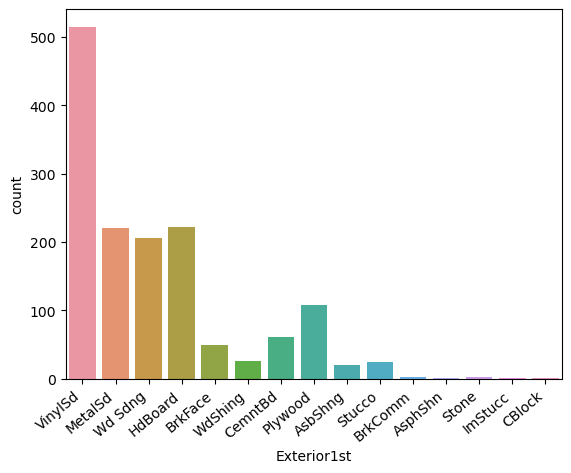

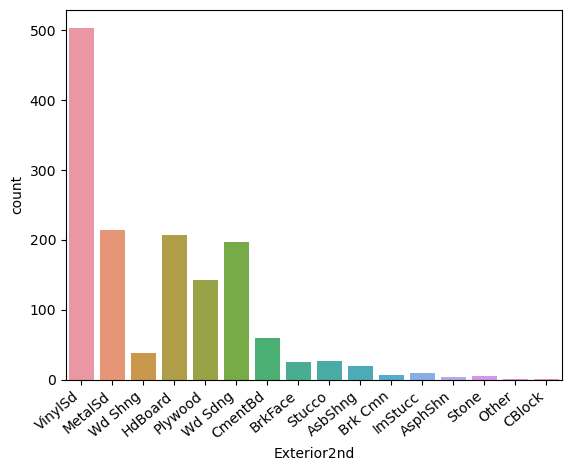

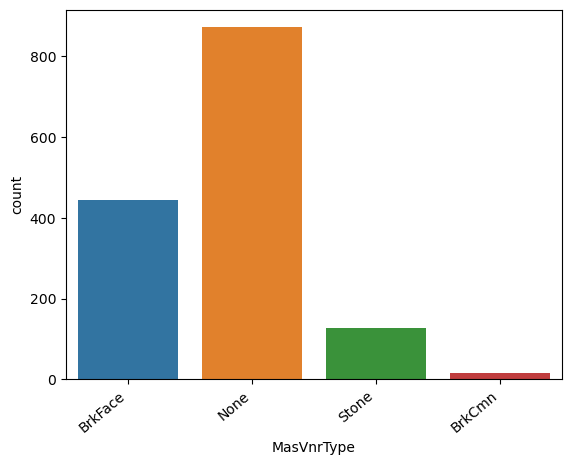

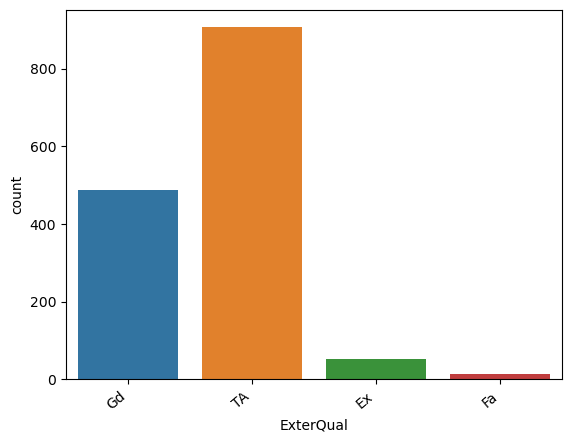

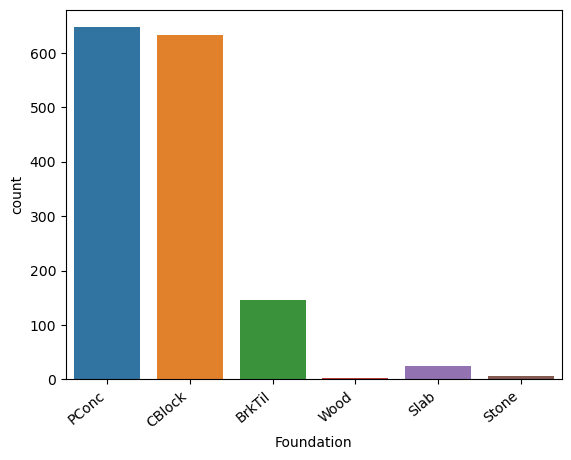

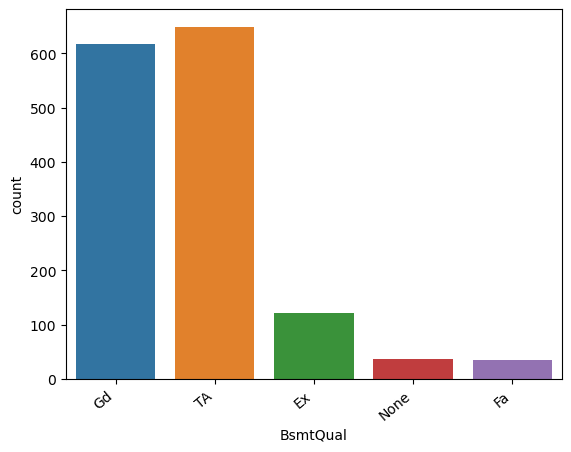

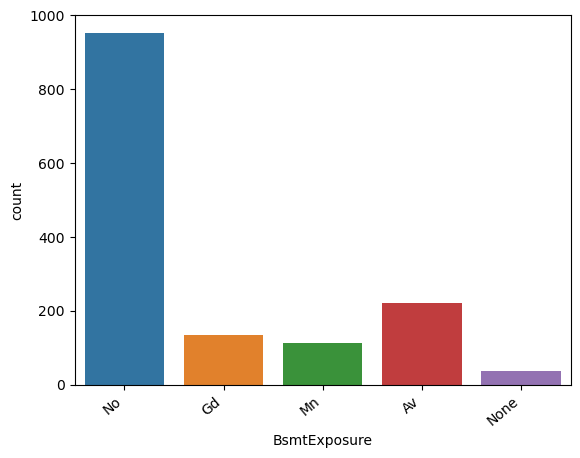

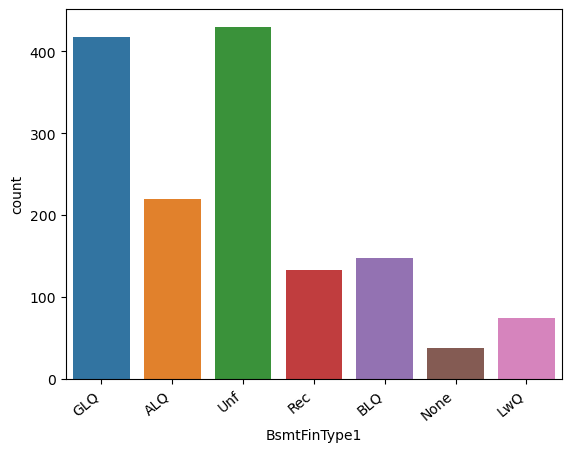

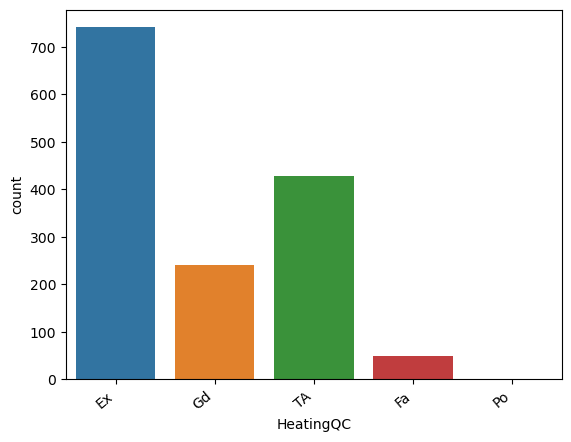

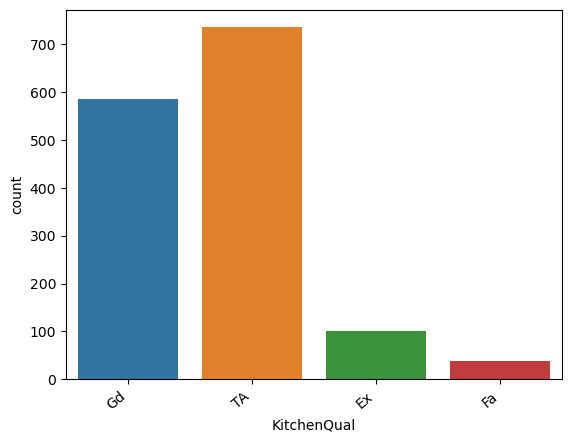

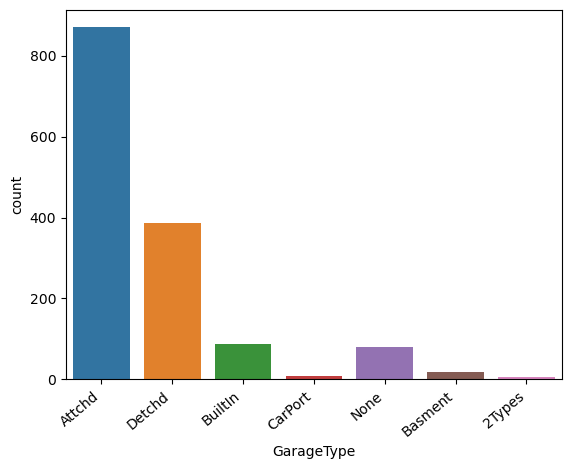

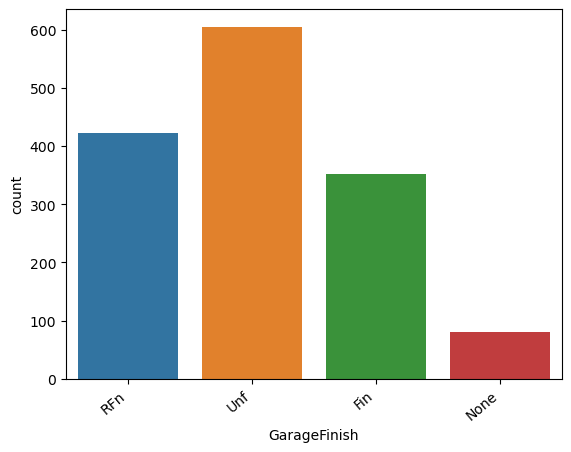

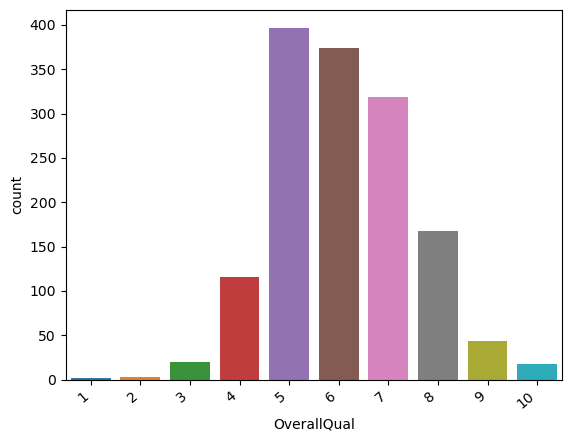

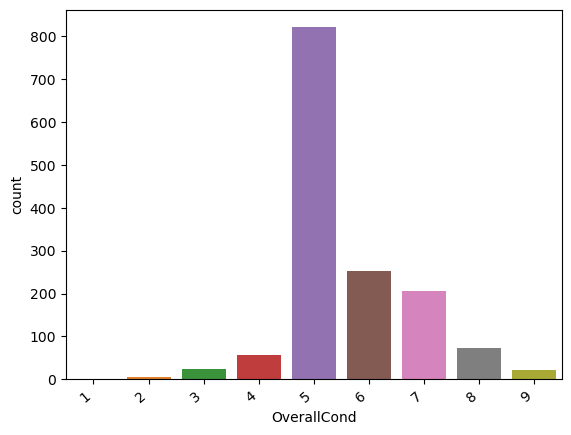

In [161]:
def plot_categorical(cols_cat,df_cat):
      for col in cols_cat:
            sns.countplot(x=df_cat[col])
            ax=sns.countplot(x=df_cat[col])
            ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
            plt.show()



plot_categorical(cat_col_F,df)

### Bivariate Analysis

###### Bivariate Analysis of  Categorical Variables

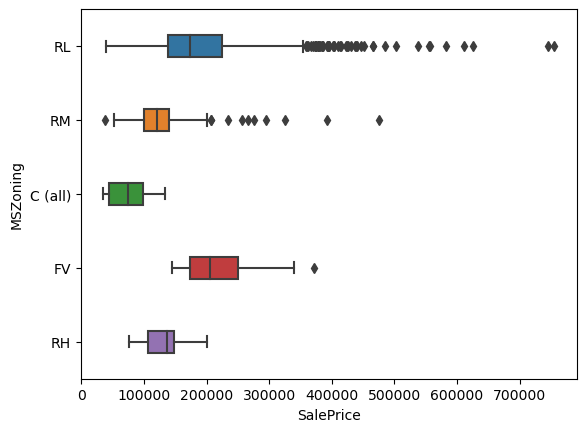

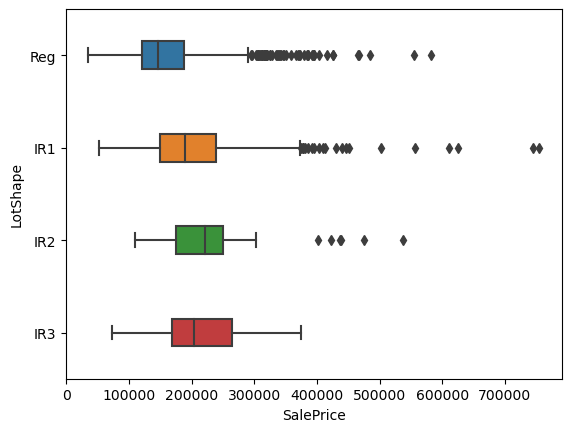

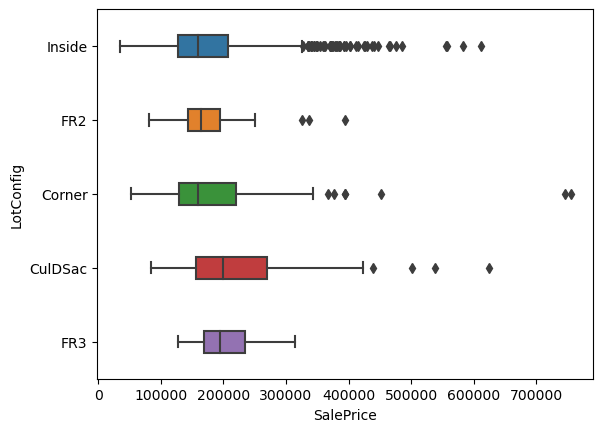

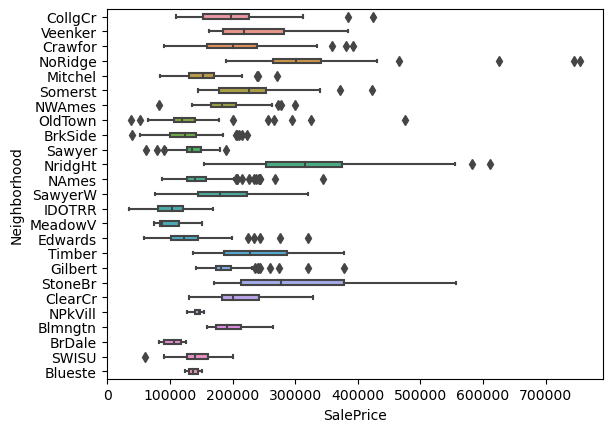

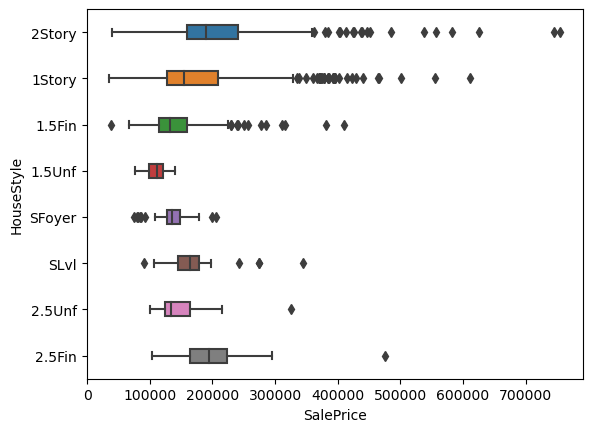

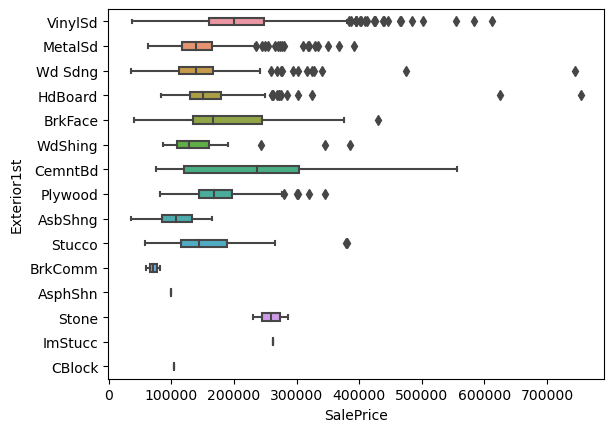

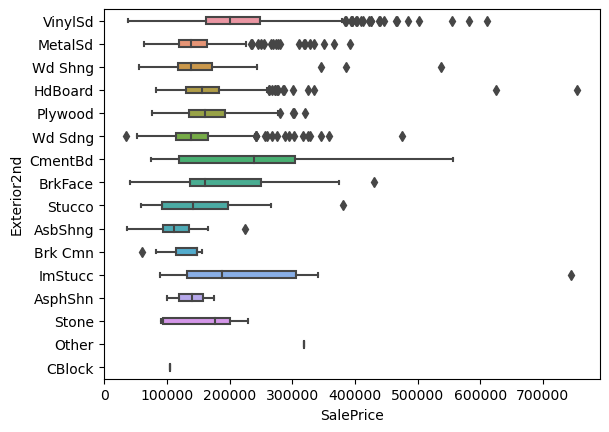

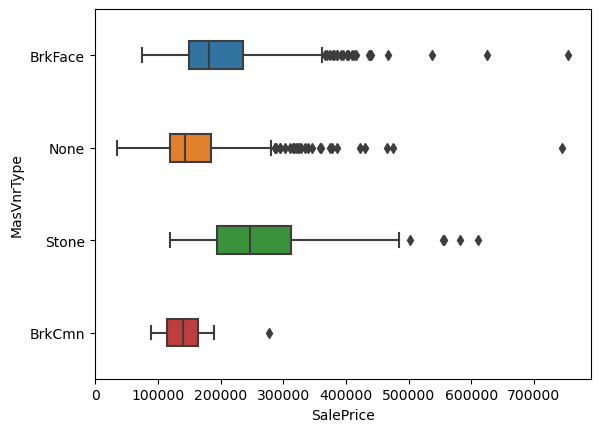

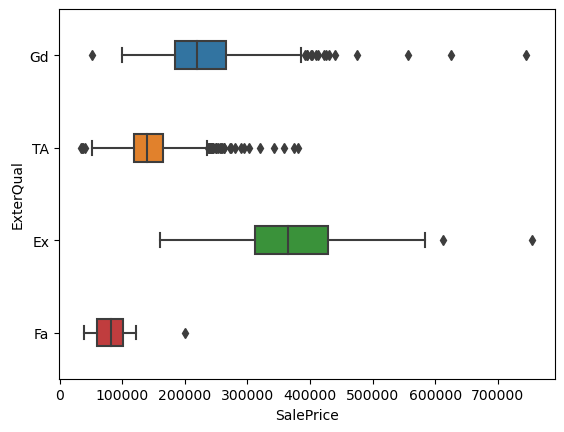

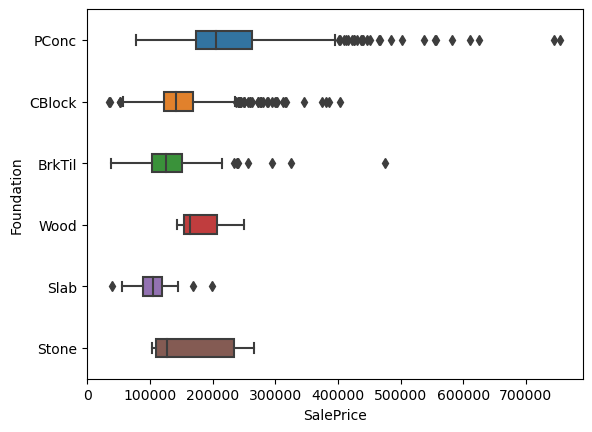

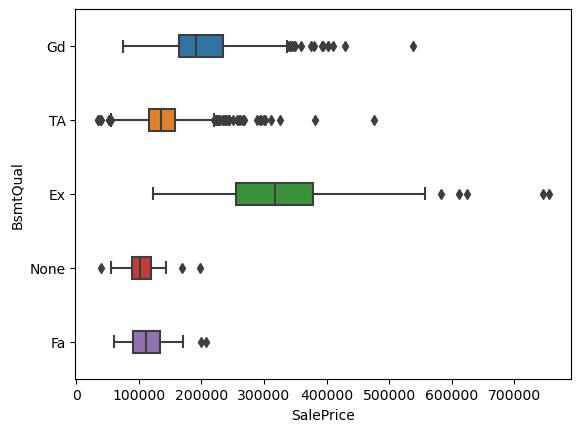

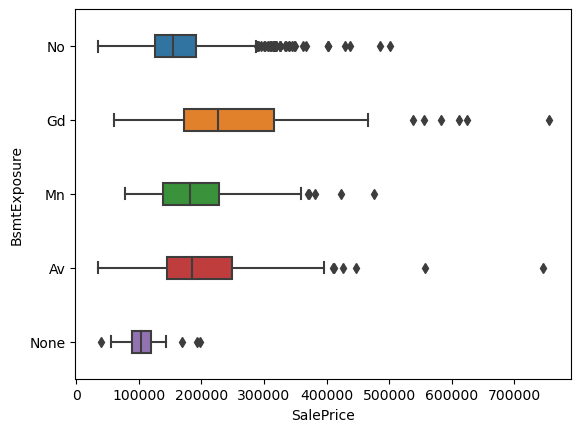

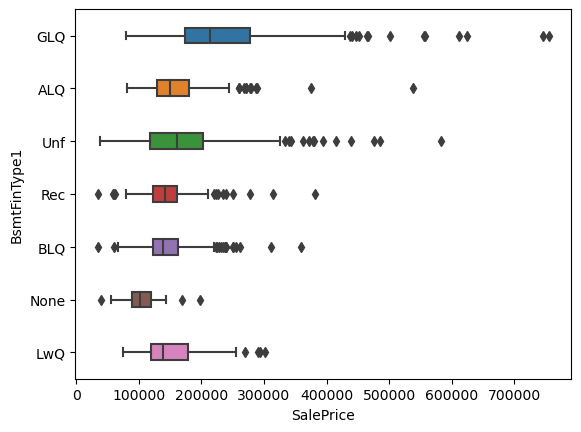

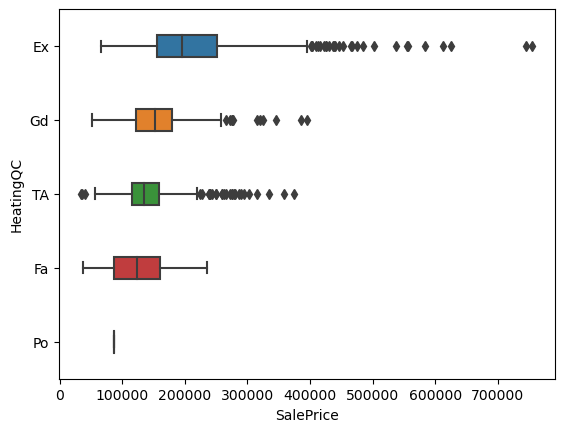

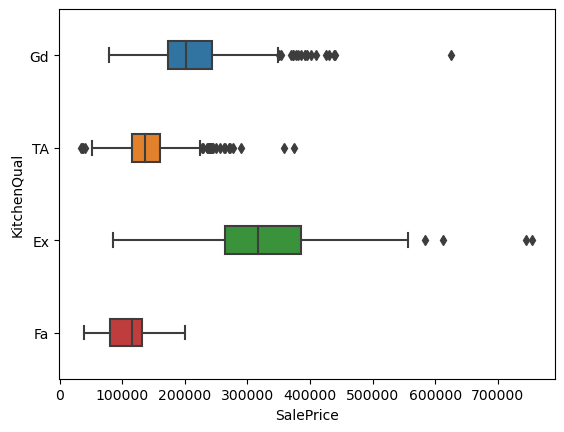

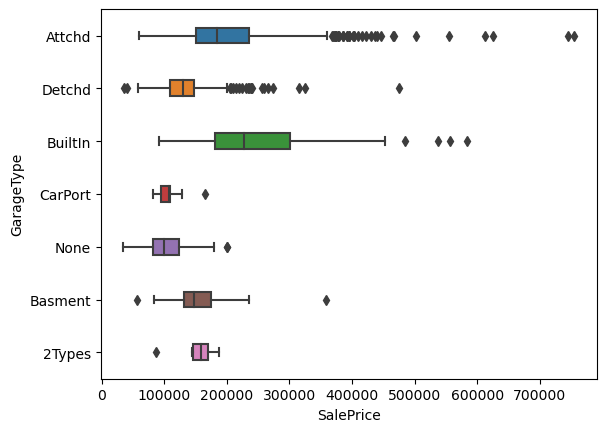

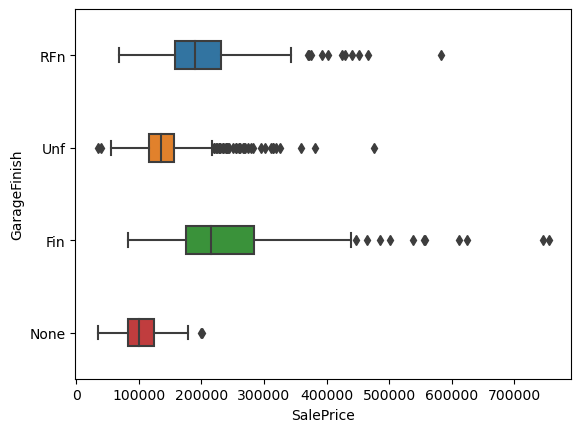

In [162]:
for i in cat_col:
    sns.boxplot(y=df[i],x=df["SalePrice"], width=(0.3))
    plt.show()

#### Bivariate Analysis of Continous columns

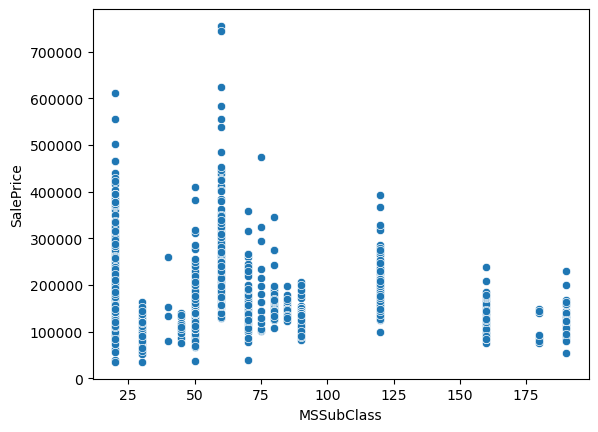

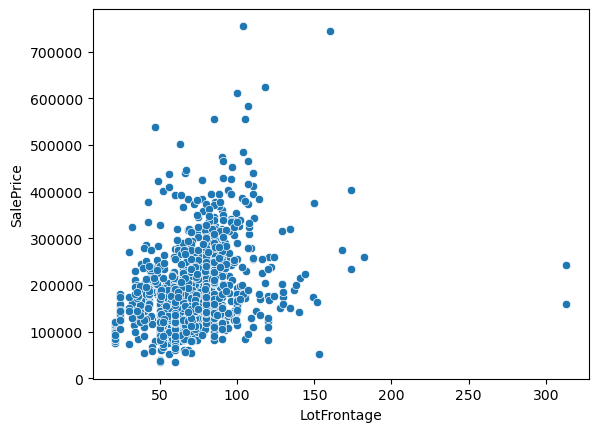

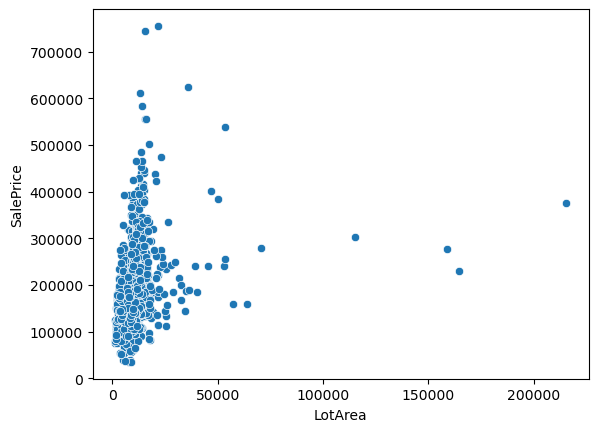

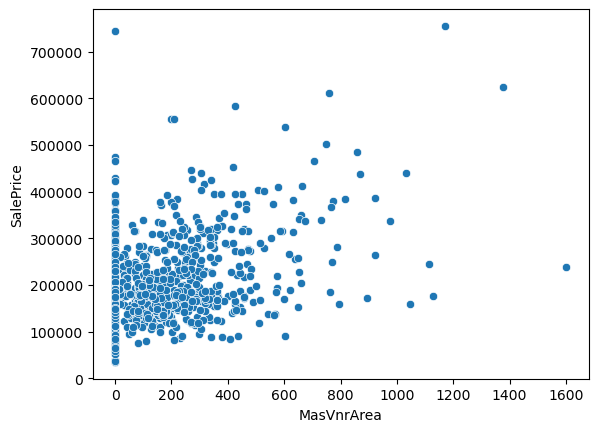

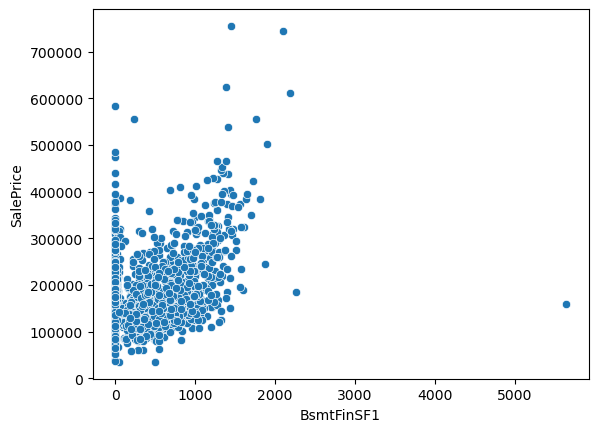

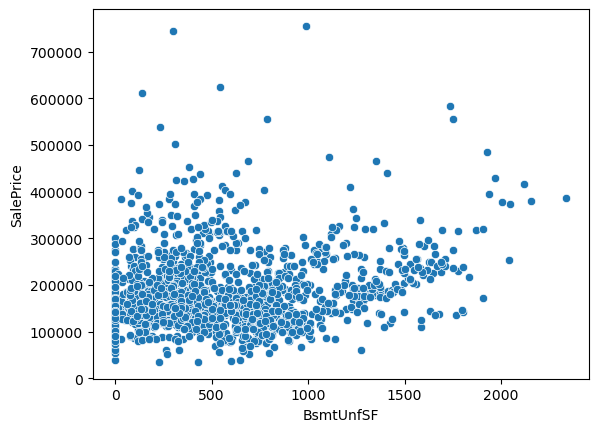

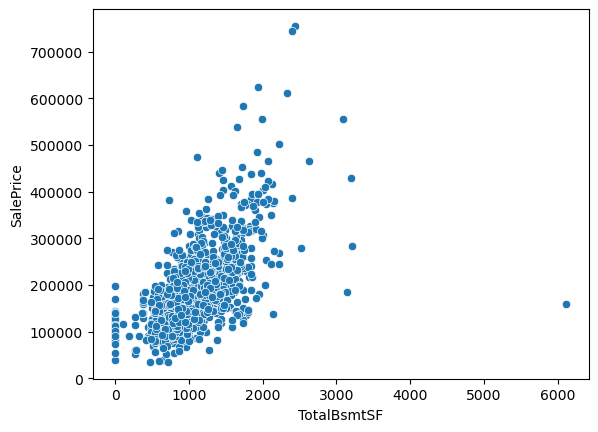

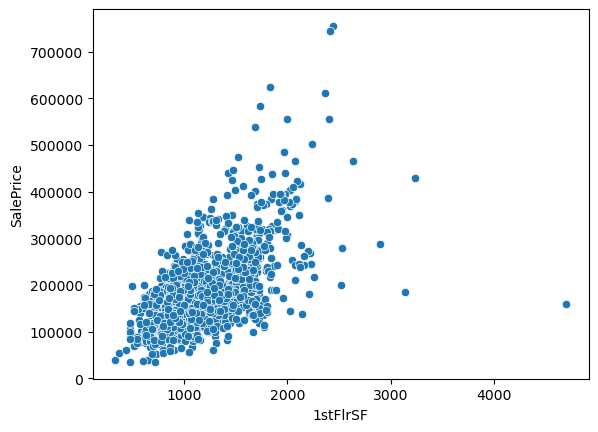

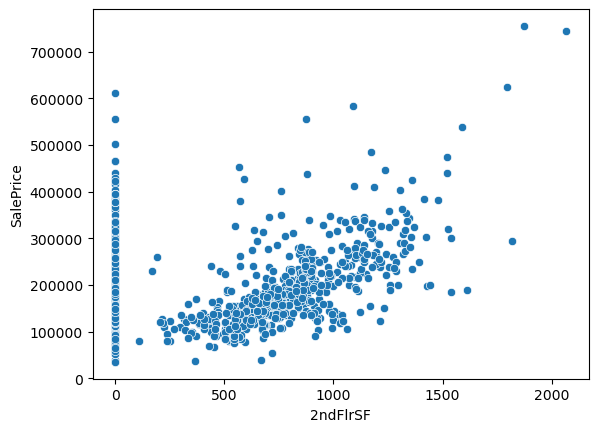

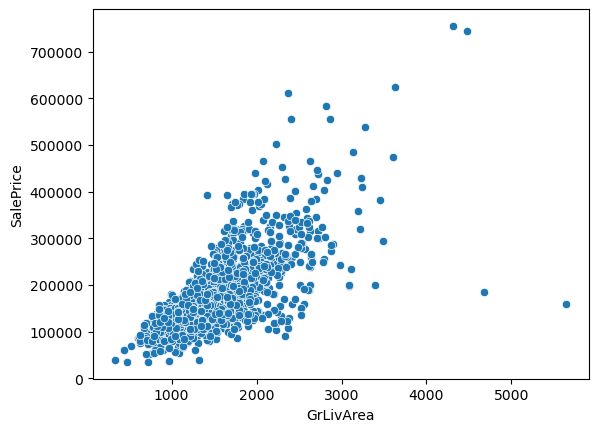

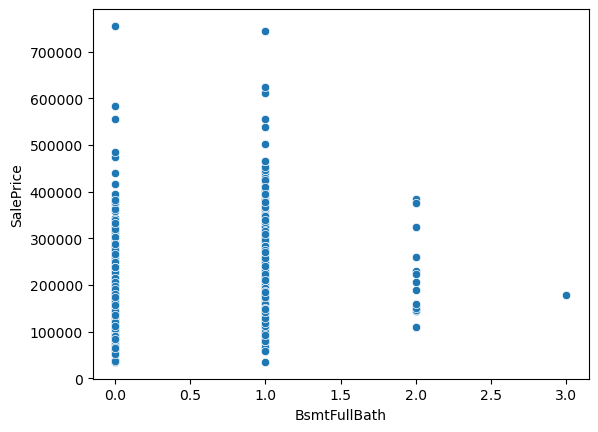

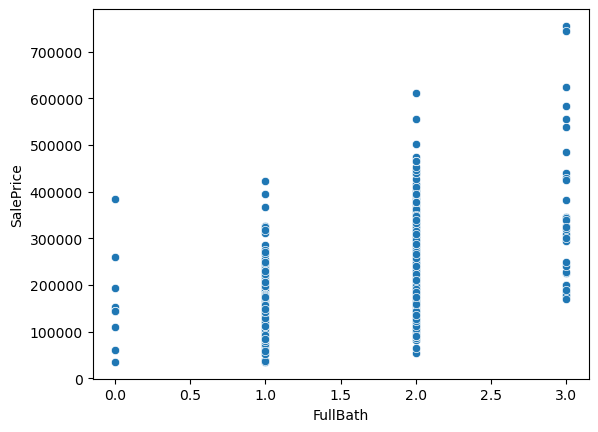

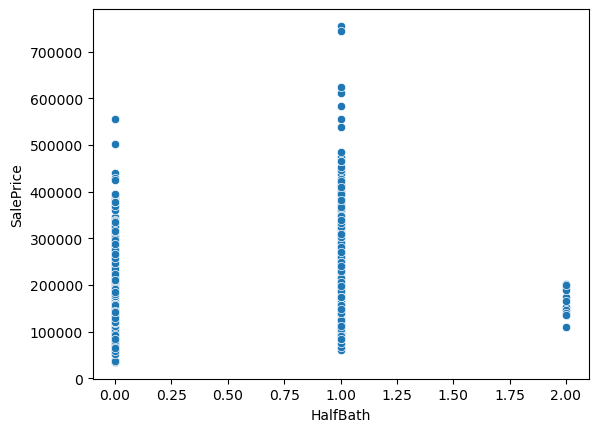

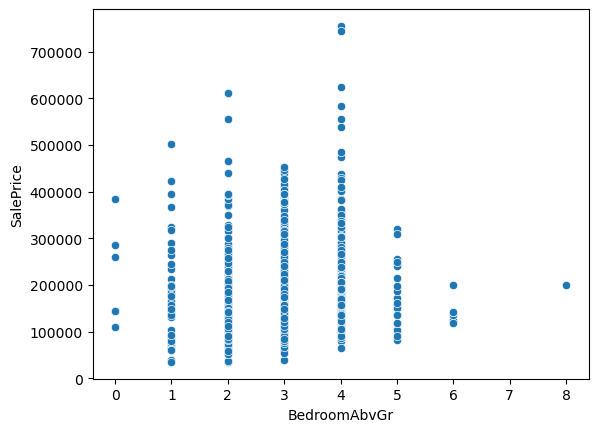

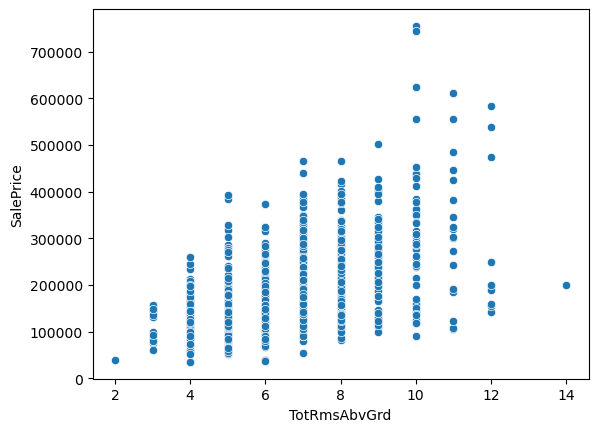

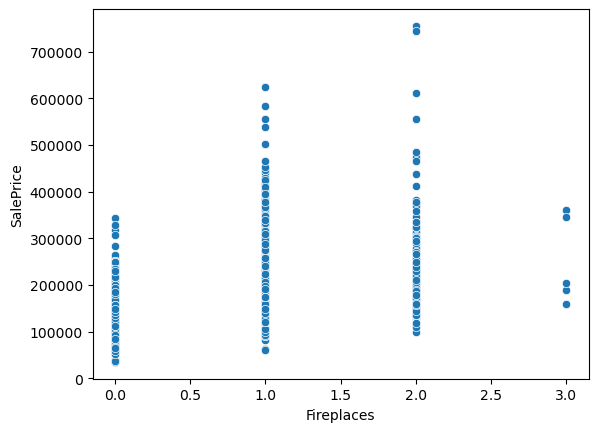

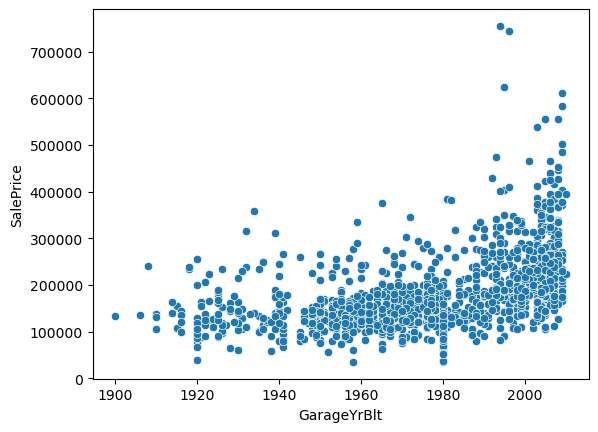

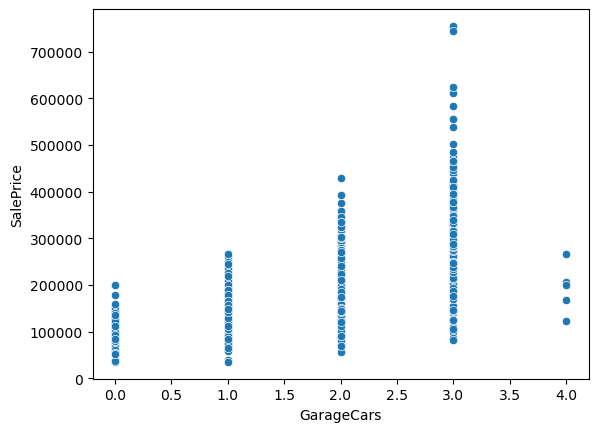

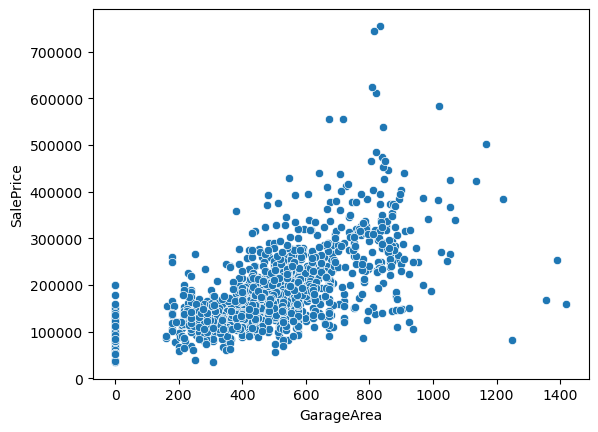

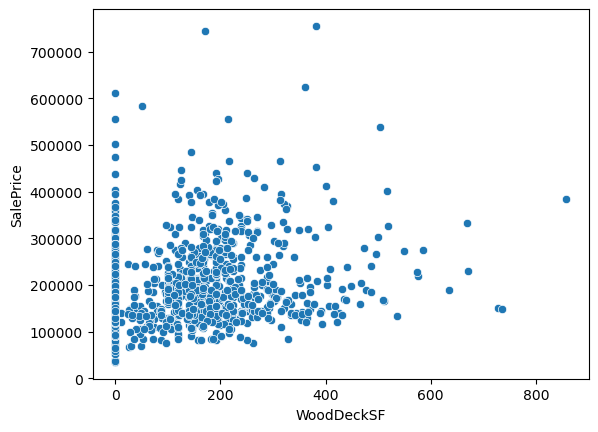

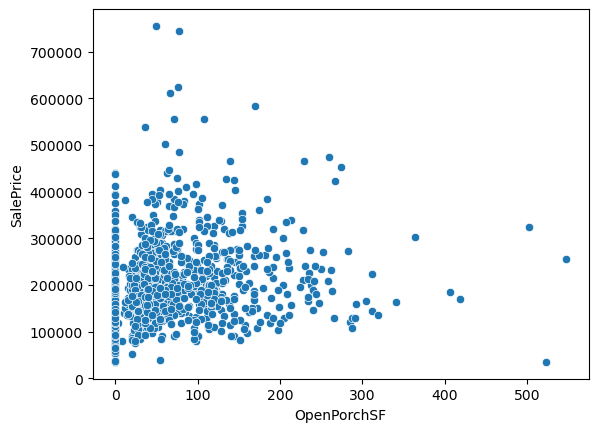

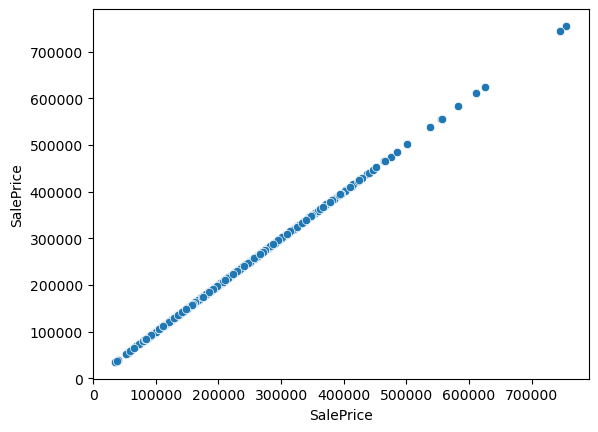

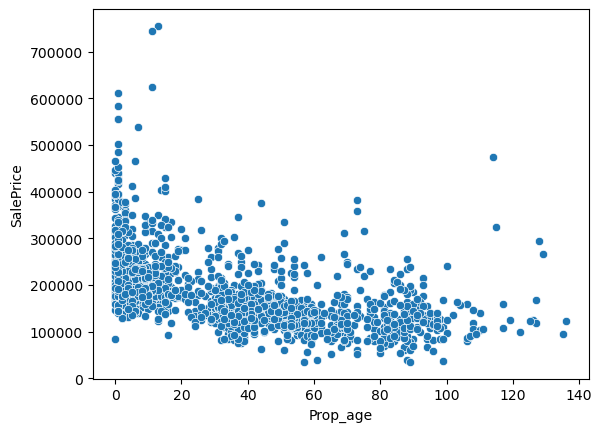

In [163]:
for i in num_col_updated:
    sns.scatterplot(x=df[i],y=df["SalePrice"])
    plt.show()

#### Multivariate Analysis for co relation

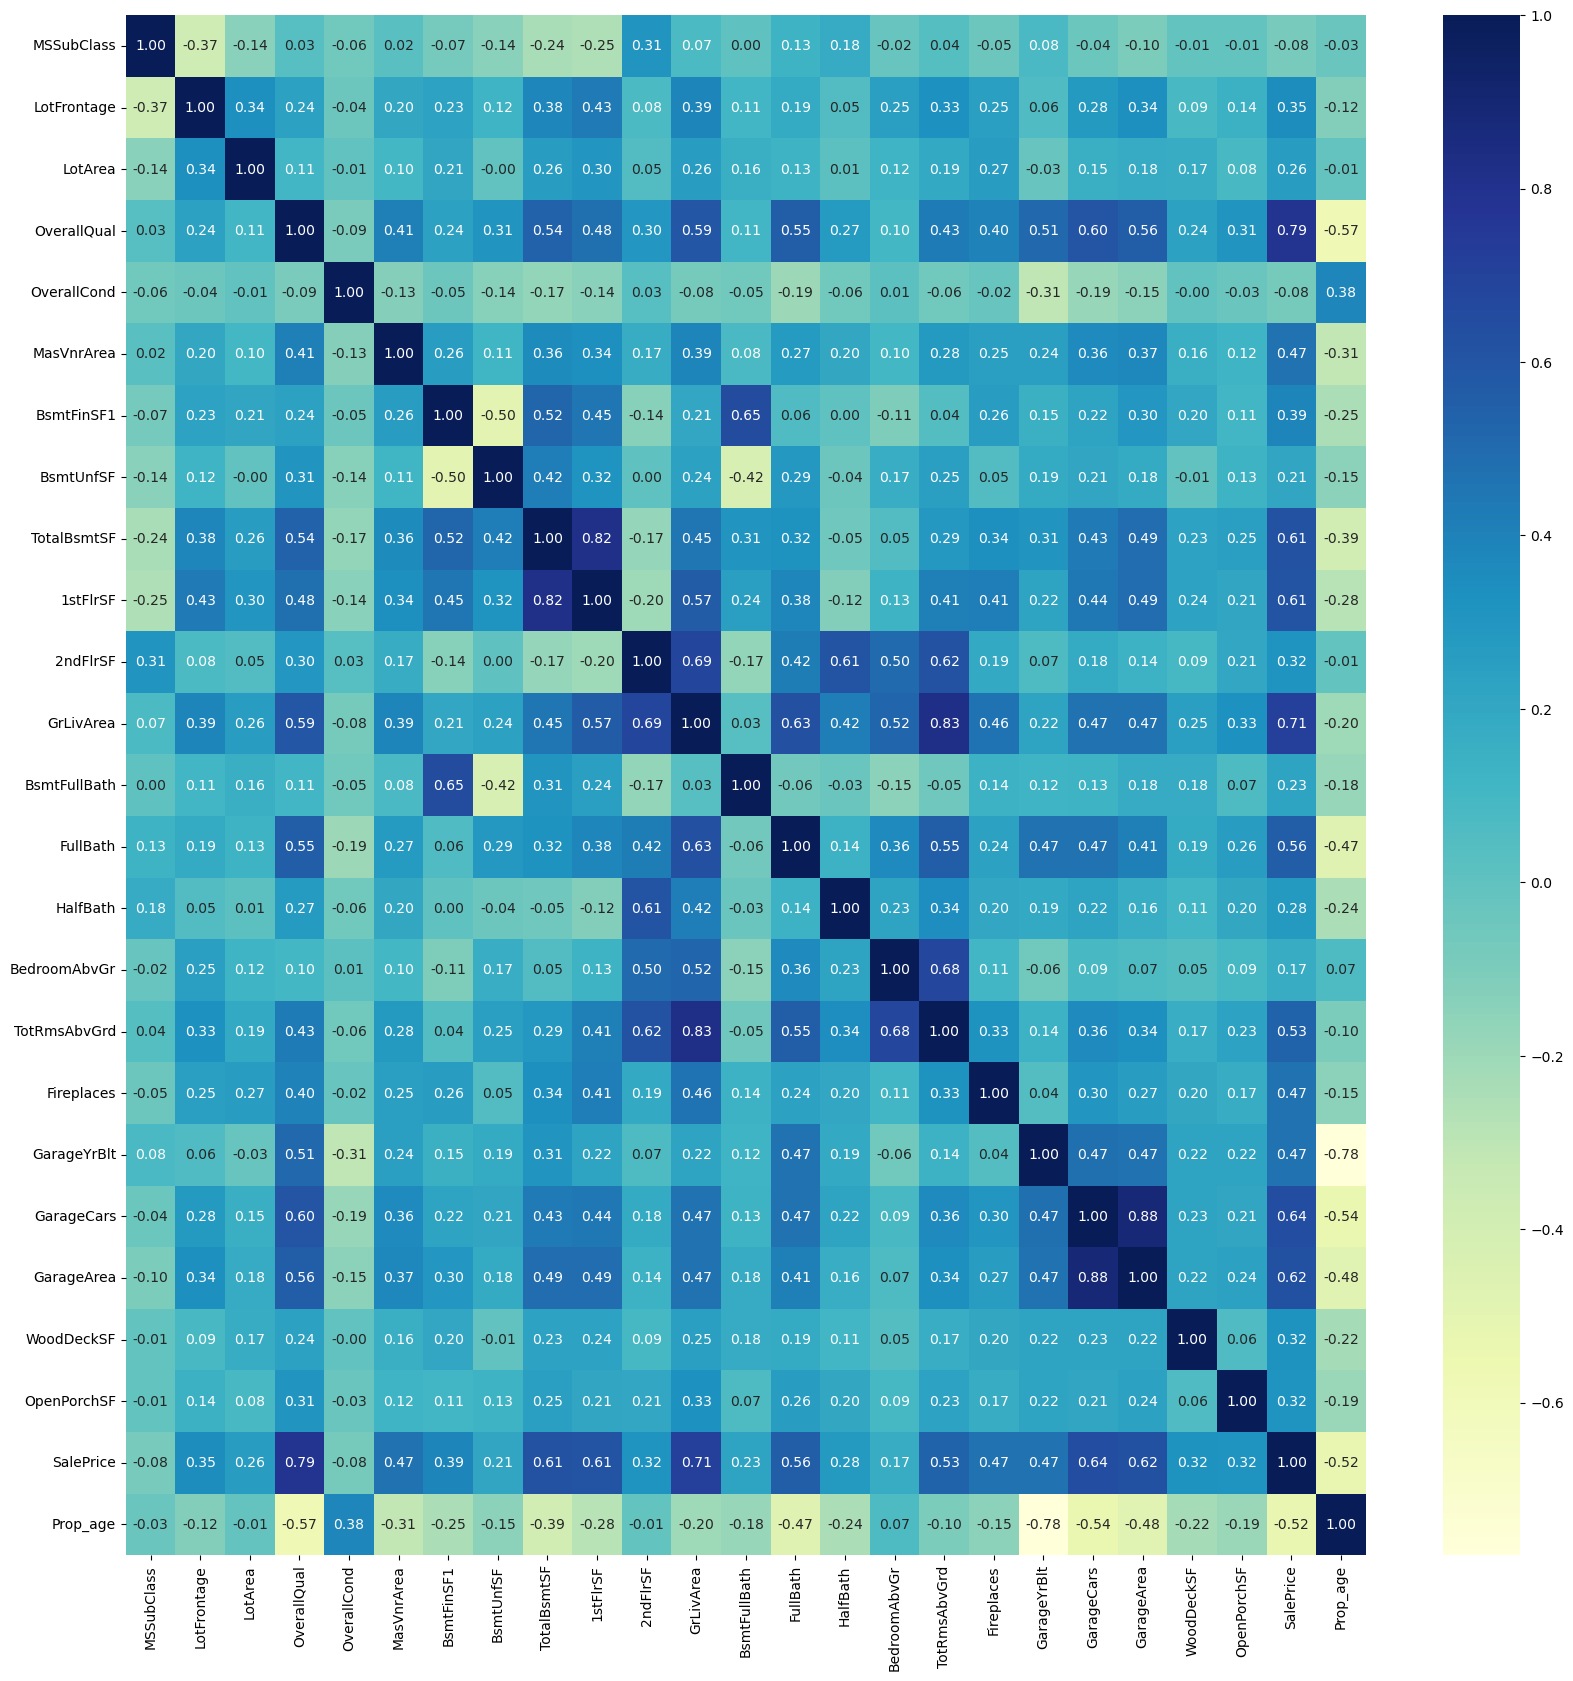

In [164]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap="YlGnBu")
plt.show()

In [165]:
cor = df[num_col_updated].corr()
cor

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Prop_age
MSSubClass,1.000000,-0.370367,-0.139781,0.023573,-0.069836,-0.140759,-0.238518,-0.251758,0.307886,0.074853,0.003491,0.131608,0.177354,-0.023438,0.040380,-0.045569,0.081396,-0.040110,-0.098672,-0.012579,-0.006100,-0.084284,-0.028746
LotFrontage,-0.370367,1.000000,0.335957,0.195830,0.232576,0.119174,0.381038,0.434109,0.075686,0.385190,0.107226,0.186561,0.054190,0.245232,0.332619,0.249295,0.062380,0.281393,0.339085,0.088736,0.141734,0.349876,-0.120601
LotArea,-0.139781,0.335957,1.000000,0.103321,0.214103,-0.002618,0.260833,0.299475,0.050986,0.263116,0.158155,0.126031,0.014259,0.119690,0.190015,0.271364,-0.025865,0.154871,0.180403,0.171698,0.084774,0.263843,-0.014832
MasVnrArea,0.023573,0.195830,0.103321,1.000000,0.261256,0.113862,0.360067,0.339850,0.173800,0.388052,0.083010,0.272999,0.199108,0.102775,0.279568,0.247015,0.244444,0.361945,0.370884,0.159991,0.122528,0.472614,-0.311479
BsmtFinSF1,-0.069836,0.232576,0.214103,0.261256,1.000000,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.649212,0.058543,0.004262,-0.107355,0.044316,0.260011,0.148782,0.224054,0.296970,0.204306,0.111761,0.386420,-0.248483
BsmtUnfSF,-0.140759,0.119174,-0.002618,0.113862,-0.495251,1.000000,0.415360,0.317987,0.004469,0.240257,-0.422900,0.288886,-0.041118,0.166643,0.250647,0.051575,0.185610,0.214175,0.183303,-0.005316,0.129005,0.214479,-0.150619
TotalBsmtSF,-0.238518,0.381038,0.260833,0.360067,0.522396,0.415360,1.000000,0.819530,-0.174512,0.454868,0.307351,0.323722,-0.048804,0.050450,0.285573,0.339519,0.309386,0.434585,0.486665,0.232019,0.247264,0.613581,-0.391498
1stFlrSF,-0.251758,0.434109,0.299475,0.339850,0.445863,0.317987,0.819530,1.000000,-0.202646,0.566024,0.244671,0.380637,-0.119916,0.127401,0.409516,0.410531,0.224897,0.439317,0.489782,0.235459,0.211671,0.605852,-0.282143
2ndFlrSF,0.307886,0.075686,0.050986,0.173800,-0.137079,0.004469,-0.174512,-0.202646,1.000000,0.687501,-0.169494,0.421378,0.609707,0.502901,0.616423,0.194561,0.068441,0.183926,0.138347,0.092165,0.208026,0.319334,-0.011552
GrLivArea,0.074853,0.385190,0.263116,0.388052,0.208171,0.240257,0.454868,0.566024,0.687501,1.000000,0.034836,0.630012,0.415772,0.521270,0.825489,0.461679,0.219801,0.467247,0.468997,0.247433,0.330224,0.708624,-0.200302


In [166]:
#Dropping columns bcoz of high correlation
corr_num_col=['GarageArea','TotRmsAbvGrd','BedroomAbvGr','2ndFlrSF']

In [167]:
#droping high corelated cols
df.drop(axis=1,labels=corr_num_col,inplace=True)

In [168]:
#updated num_col_updated
num_col_updated.remove('GarageArea')

In [169]:
num_col_updated.remove('TotRmsAbvGrd')
num_col_updated.remove('BedroomAbvGr')
num_col_updated.remove('2ndFlrSF')

In [170]:
df.shape

(1460, 38)

#### Dummy Variable Creation (One Hot Encoding)


In [171]:
Cat_dum=pd.get_dummies(df[cat_col_F],drop_first=True,dtype=int)#dummies=n-1

In [172]:
Cat_dum.head()

,OverallQual,OverallCond,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
0,7,5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,6,8,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,7,5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
3,7,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,8,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [173]:
df_house=pd.concat([df,Cat_dum],axis=1)

In [174]:
df_house.shape

(1460, 152)

In [175]:
df_house.drop(axis=1,labels=cat_col_F,inplace=True)

In [176]:
df_house.shape

(1460, 131)

## Splitting the Data into Training and Testing Sets


In [177]:
df_train, df_test=train_test_split(df_house, train_size = 0.7, test_size = 0.3, random_state = 100)

In [178]:
df_train.shape

(1021, 131)

In [179]:
df_test.shape

(438, 131)

In [180]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,Prop_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
210,30,67.0,5604,0.0,468,396,864,864,864,1,1,0,0,1980.0,0,0,0,98000,83,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0
318,60,90.0,9900,256.0,987,360,1347,1372,2646,1,2,1,1,1993.0,3,340,60,260000,16,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
239,50,52.0,8741,0.0,94,641,735,798,1487,0,1,1,1,1949.0,1,0,140,113000,65,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
986,50,59.0,5310,0.0,0,485,485,1001,1635,0,1,0,0,1950.0,1,394,0,117000,96,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1416,190,60.0,11340,0.0,0,777,777,1246,2290,0,2,0,0,1971.0,2,0,0,122500,125,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1


## Rescaling the Features
### We will use MinMax scaling.

In [181]:
scaler = MinMaxScaler()

In [182]:
df_train[num_col_updated] = scaler.fit_transform(df_train[num_col_updated])

In [183]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,Prop_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
210,0.058824,0.157534,0.019306,0.00,0.082920,0.169521,0.141408,0.113889,0.081860,0.333333,0.333333,0.0,0.000000,0.727273,0.00,0.000000,0.000000,0.087627,0.610294,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0
318,0.235294,0.236301,0.039403,0.16,0.174876,0.154110,0.220458,0.231481,0.424289,0.333333,0.666667,0.5,0.333333,0.845455,0.75,0.396733,0.114723,0.312595,0.117647,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
239,0.176471,0.106164,0.033981,0.00,0.016655,0.274401,0.120295,0.098611,0.201576,0.000000,0.333333,0.5,0.333333,0.445455,0.25,0.000000,0.267686,0.108457,0.477941,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
986,0.176471,0.130137,0.017931,0.00,0.000000,0.207620,0.079378,0.145602,0.230015,0.000000,0.333333,0.0,0.000000,0.454545,0.25,0.459743,0.000000,0.114012,0.705882,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1416,1.000000,0.133562,0.046139,0.00,0.000000,0.332620,0.127169,0.202315,0.355880,0.000000,0.666667,0.0,0.000000,0.645455,0.50,0.000000,0.000000,0.121650,0.919118,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

## Applying the scaling on the test sets


In [184]:
# Apply scaler() to all the columns except the dummy' variables
df_test[num_col_updated] = scaler.fit_transform(df_test[num_col_updated])

In [185]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,Prop_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
1436,0.000000,0.133562,0.048827,0.00000,0.281536,0.128165,0.342314,0.242009,0.161881,0.0,0.333333,0.0,0.0,0.653465,0.666667,0.000000,0.000000,0.143963,0.266667,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
57,0.235294,0.232877,0.065599,0.00000,0.000000,0.444444,0.340729,0.240183,0.423335,0.0,0.666667,0.5,0.0,0.950495,0.666667,0.000000,0.127971,0.276424,0.014815,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
780,0.000000,0.143836,0.041693,0.04126,0.000000,0.639276,0.490095,0.419635,0.280696,0.0,0.666667,0.0,0.5,0.861386,0.666667,0.302198,0.038391,0.240694,0.088889,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
382,0.235294,0.198630,0.050380,0.00000,0.000000,0.485271,0.372029,0.276256,0.446854,0.0,0.666667,0.5,0.0,0.970297,0.666667,0.197802,0.096892,0.306053,0.007407,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1170,0.352941,0.188356,0.054407,0.00000,0.238574,0.296641,0.434231,0.357991,0.239462,0.5,0.333333,0.0,0.5,0.683168,0.333333,0.278846,0.000000,0.231980,0.229630,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

## Model Building

## Dividing into X and Y sets for the model building


In [186]:
y_train = df_train.pop('SalePrice')
X_train = df_train

## Dividing into X_test and y_test

In [187]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [188]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [189]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [190]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =4.0

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.04873722 -0.00545054  0.04045149  0.03665522  0.01395435  0.01936881
  0.02757676  0.06295961  0.12980773  0.02704036  0.05949492  0.02171784
  0.03430854  0.00538458  0.06178445  0.02309067  0.00209476 -0.00091197
  0.01043051  0.01583511  0.01787758  0.01149134  0.00216759 -0.02593845
  0.00145155  0.01594404 -0.01970805 -0.00844933 -0.00171205 -0.00137032
 -0.00645936 -0.00617178 -0.00100643 -0.00629718  0.03750357 -0.03359715
 -0.01318286 -0.01854126 -0.01994564 -0.0231864  -0.01533741  0.00097266
 -0.00268287  0.07944619  0.04236232 -0.01474051 -0.00630406 -0.02058675
 -0.00603844  0.0286421   0.03848045 -0.00171352  0.02049213 -0.0070927
 -0.01195112  0.00422408  0.01590323  0.00505688 -0.00920143 -0.0077409
  0.00172438 -0.00692101  0.02647629 -0.00378532  0.00323314  0.00039512
 -0.00965658 -0.00329926  0.00032152  0.00932846  0.00356863 -0.000542
  0.00657065  0.00559049  0.00172438 -0.00656391  0.00259368 -0.00378532
  0.01145144  0.00624201  0.02623215  0.00672286  0.   

In [191]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.8594173535801374
0.8331474557929995
1.7298734648164702
1.4286558543510195
0.001694293305403007
0.0032617713569657977


#### Lasso

In [192]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [194]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [195]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [196]:
lasso.coef_

array([-0.04926453, -0.02466969,  0.06595609,  0.02324307, -0.        ,
        0.        ,  0.        , -0.        ,  0.34698885,  0.02069923,
        0.03068526,  0.00736494,  0.02438813,  0.00142353,  0.06018616,
        0.01598909, -0.        , -0.01448864,  0.        ,  0.        ,
        0.00639537,  0.        ,  0.        , -0.03083952,  0.00142616,
        0.01476944, -0.01401847, -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.04006295,
       -0.03033925, -0.        , -0.01221021, -0.00060658, -0.0168676 ,
       -0.01144286,  0.        ,  0.        ,  0.0834519 ,  0.05329883,
       -0.01046378, -0.00191802, -0.01593336, -0.        ,  0.0393819 ,
        0.04978364,  0.        ,  0.02167053,  0.        ,  0.00166928,
       -0.00047997,  0.        , -0.00209718,  0.        ,  0.        ,
        0.        , -0.        ,  0.02307746, -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.00121112, -0.  

In [197]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8657756964368492
0.82439870315592
1.65163387502257
1.503566049653323
0.0016176629530093732
0.003432799200121742


In [198]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 

        }
# r_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )


rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric,rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.859417,0.865776
1,R2 Score (Test),0.833147,0.824399
2,RSS (Train),1.729873,1.651634
3,RSS (Test),1.428656,1.503566
4,MSE (Train),0.041162,0.040220
5,MSE (Test),0.057112,0.058590


In [199]:
betas = pd.DataFrame(index=X_train.columns)

In [200]:
betas.rows = X_train.columns

In [201]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [202]:
pd.set_option('display.max_rows', None)
betas

,Ridge,Lasso
MSSubClass,-0.048737,-0.049265
LotFrontage,-0.005451,-0.024670
LotArea,0.040451,0.065956
MasVnrArea,0.036655,0.023243
BsmtFinSF1,0.013954,-0.000000
BsmtUnfSF,0.019369,0.000000
TotalBsmtSF,0.027577,0.000000
1stFlrSF,0.062960,-0.000000
GrLivArea,0.129808,0.346989
BsmtFullBath,0.027040,0.020699


In [203]:
#Top 5 ridge Coeficient
print(betas.sort_values(by=['Ridge'], ascending = False).head(5))


                         Ridge     Lasso
GrLivArea             0.129808  0.346989
Neighborhood_NoRidge  0.079446  0.083452
1stFlrSF              0.062960 -0.000000
GarageCars            0.061784  0.060186
FullBath              0.059495  0.030685


## Top 5 co efficient for Ridge  Regression are

### 1.  GrLivArea, 2.  Neighborhood_NoRidge,   ,3.1stFlrSF, 4.  GarageCars,5.  FullBath 


In [204]:
#Top 5 ridge Coeficient
print(betas.sort_values(by=['Lasso'], ascending = False).head(5))


                         Ridge     Lasso
GrLivArea             0.129808  0.346989
Neighborhood_NoRidge  0.079446  0.083452
LotArea               0.040451  0.065956
GarageCars            0.061784  0.060186
Neighborhood_NridgHt  0.042362  0.053299


## Top 5 co efficient for Lasso  Regression are

### 1.  GrLivArea, 2.  Neighborhood_NoRidge, 3.  LotArea	, 4.  GarageCars  ,5.   Neighborhood_NridgHt


## Observations
1.R2 score of test data of Ridge is little better but considering the number of variables in Lasso.
- Model build using Lasso Regression is better.  
- So the top predictive co efficients of Lasso Regression Model Are
- GrLivArea: Above grade (ground) living area square feet
- Neighborhood_NoRidge: Northridge
- LotArea: Lot size in square feet
- GarageCars: Size of garage in car capacity
- Neighborhood_NridgHt:Northridge Heights


## Solution  for Subjective question 1 
### Double the value of alpha for both ridge and lasso

In [205]:
# for alpha =8 in Ridge Regression
alpha =8.0

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-4.50715235e-02  5.12738289e-03  2.58225422e-02  3.50008688e-02
  1.73373214e-02  2.37488754e-02  2.99224402e-02  5.66345927e-02
  9.63199493e-02  2.50440497e-02  5.76166838e-02  2.28578611e-02
  3.84534180e-02  7.69592177e-03  5.73832508e-02  2.28566354e-02
  6.34311471e-03 -4.45639965e-03  7.05090366e-03  9.81193238e-03
  1.37643207e-02  3.89160442e-03  2.17858426e-03 -1.86370630e-02
  3.60870948e-04  1.60195923e-02 -1.73208876e-02 -5.76456351e-03
 -1.90652553e-03 -4.86532305e-04 -4.98995221e-03 -5.10931988e-03
 -4.70761406e-05 -8.83420576e-03  3.45228079e-02 -3.15265625e-02
 -1.68658378e-02 -1.62322397e-02 -1.52207385e-02 -2.05347055e-02
 -1.48634897e-02 -1.91137039e-04 -2.15077380e-03  7.19866474e-02
  3.86771640e-02 -1.05925521e-02 -3.93849221e-03 -1.87600313e-02
 -7.24265375e-03  2.21822044e-02  2.97114624e-02 -1.07849886e-03
  1.51267470e-02 -6.75362582e-03 -1.27001288e-02  5.58351800e-03
  1.24804528e-02  6.81511981e-03 -1.07548307e-02 -9.16410888e-03
  1.09423940e-03 -5.50408

In [206]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8507716212907478
0.825126059324557
1.8362594466726843
1.4973381455271961
0.001798491132882159
0.0034185802409296717


In [207]:
#Fitting Ridge model for alpha = 0.0002 and printing coefficients which have been penalised

alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [208]:
lasso.coef_

array([-4.56206985e-02, -0.00000000e+00,  0.00000000e+00,  1.81189714e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.38042958e-01,  1.91774607e-02,  2.78298967e-02,  6.59021707e-03,
        2.80056805e-02,  5.32471187e-04,  6.07660207e-02,  1.58106694e-02,
        0.00000000e+00, -1.86585401e-02,  0.00000000e+00,  0.00000000e+00,
        6.84341308e-03, -0.00000000e+00,  0.00000000e+00, -1.33320396e-02,
        1.41067587e-04,  1.52356691e-02, -8.01161732e-03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.60311515e-02, -2.81837044e-02,
       -0.00000000e+00, -8.93077532e-03, -0.00000000e+00, -1.13074406e-02,
       -1.12813793e-02,  0.00000000e+00,  0.00000000e+00,  8.16000114e-02,
        5.22247552e-02, -9.07305458e-03, -0.00000000e+00, -1.31373269e-02,
       -0.00000000e+00,  3.60816384e-02,  4.16121595e-02,  0.00000000e+00,
        1.00340516e-02,  

In [209]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.8586270397821736
0.822882957548593
1.7395982985907101
1.5165444483100918
0.0017038181181103919
0.0034624302472833148


In [210]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 

        }
# r_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )


rg_metric = pd.Series(metric3, name = 'Ridge Regression')
ls_metric = pd.Series(metric4, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric,rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.850772,0.858627
1,R2 Score (Test),0.825126,0.822883
2,RSS (Train),1.836259,1.739598
3,RSS (Test),1.497338,1.516544
4,MSE (Train),0.042409,0.041277
5,MSE (Test),0.058469,0.058842


In [211]:
betas2 = pd.DataFrame(index=X_train.columns)

In [212]:
betas2.rows = X_train.columns

In [213]:
betas2['Ridge'] = ridge.coef_
betas2['Lasso'] = lasso.coef_

In [214]:
pd.set_option('display.max_rows', None)
betas2

,Ridge,Lasso
MSSubClass,-0.045072,-0.045621
LotFrontage,0.005127,-0.000000
LotArea,0.025823,0.000000
MasVnrArea,0.035001,0.018119
BsmtFinSF1,0.017337,0.000000
BsmtUnfSF,0.023749,0.000000
TotalBsmtSF,0.029922,0.000000
1stFlrSF,0.056635,0.000000
GrLivArea,0.096320,0.338043
BsmtFullBath,0.025044,0.019177


In [215]:
#Top 5 ridge Coeficient after alpha is doubled
print(betas2.sort_values(by=['Ridge'], ascending = False).head(5))


                         Ridge     Lasso
GrLivArea             0.096320  0.338043
Neighborhood_NoRidge  0.071987  0.081600
FullBath              0.057617  0.027830
GarageCars            0.057383  0.060766
1stFlrSF              0.056635  0.000000


## Top 5 coefficient after alpha is doubled
### 1.GrLivArea , 2.  Neighborhood_NoRidge  ,3. FullBath ,  4. GarageCars 5.    1stFlrSF                              

In [216]:
#Top 5 Lasso Coeficient after alpha is doubled
print(betas2.sort_values(by=['Lasso'], ascending = False).head(5))

                         Ridge     Lasso
GrLivArea             0.096320  0.338043
Neighborhood_NoRidge  0.071987  0.081600
GarageCars            0.057383  0.060766
Neighborhood_NridgHt  0.038677  0.052225
Neighborhood_StoneBr  0.029711  0.041612


## Top 5 coefficient after alpha is doubled Lasso Regression
### 1.  GrLivArea, 2.  Neighborhood_NoRidge, 3.  GarageCars , 4.  Neighborhood_NridgHt  ,5.   Neighborhood_StoneBr            


## Subjective question 3

## Buililding Model after deleting 5 top features in Lasso Model for subjective question 3
 ### 1.  GrLivArea, 2.  Neighborhood_NoRidge, 3.  LotArea	, 4.  GarageCars  ,5.   Neighborhood_NridgHt

In [218]:
top_lasso_col=['GrLivArea','Neighborhood_NoRidge','LotArea','GarageCars','Neighborhood_NridgHt']

In [219]:
X_train.drop(axis=1, labels=top_lasso_col,inplace=True)
X_train.head()

,MSSubClass,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF,Prop_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
210,0.058824,0.157534,0.00,0.082920,0.169521,0.141408,0.113889,0.333333,0.333333,0.0,0.000000,0.727273,0.000000,0.000000,0.610294,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0
318,0.235294,0.236301,0.16,0.174876,0.154110,0.220458,0.231481,0.333333,0.666667,0.5,0.333333,0.845455,0.396733,0.114723,0.117647,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
239,0.176471,0.106164,0.00,0.016655,0.274401,0.120295,0.098611,0.000000,0.333333,0.5,0.333333,0.445455,0.000000,0.267686,0.477941,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
986,0.176471,0.130137,0.00,0.000000,0.207620,0.079378,0.145602,0.000000,0.333333,0.0,0.000000,0.454545,0.459743,0.000000,0.705882,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1416,1.000000,0.133562,0.00,0.000000,0.332620,0.127169,0.202315,0.000000,0.666667,0.0,0.000000,0.645455,0.000000,0.000000,0.919118,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [220]:
X_train.shape

(1021, 125)

In [221]:
X_test.drop(axis=1,labels=top_lasso_col,inplace=True)

In [223]:
X_test.head(5)

,MSSubClass,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF,Prop_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
1436,0.000000,0.133562,0.00000,0.281536,0.128165,0.342314,0.242009,0.0,0.333333,0.0,0.0,0.653465,0.000000,0.000000,0.266667,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
57,0.235294,0.232877,0.00000,0.000000,0.444444,0.340729,0.240183,0.0,0.666667,0.5,0.0,0.950495,0.000000,0.127971,0.014815,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
780,0.000000,0.143836,0.04126,0.000000,0.639276,0.490095,0.419635,0.0,0.666667,0.0,0.5,0.861386,0.302198,0.038391,0.088889,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
382,0.235294,0.198630,0.00000,0.000000,0.485271,0.372029,0.276256,0.0,0.666667,0.5,0.0,0.970297,0.197802,0.096892,0.007407,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1170,0.352941,0.188356,0.00000,0.238574,0.296641,0.434231,0.357991,0.5,0.333333,0.0,0.5,0.683168,0.278846,0.000000,0.229630,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0


In [224]:
X_test.shape

(438, 125)

#### Building Ridge model with 5 less features

In [225]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [226]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [227]:
#Fitting Ridge model for alpha = 3 and printing coefficients which have been penalised

alpha =2.0

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.06196677  0.02107553  0.07257107  0.02521277  0.02778925  0.04753393
  0.14845439  0.03802302  0.0862274   0.03339796  0.03900661  0.02124241
  0.03019    -0.0030631   0.00890743  0.00657588  0.02689934  0.02485157
  0.0160303   0.00134102 -0.03540146  0.0002238   0.01735959 -0.01929845
 -0.00998967 -0.00317866 -0.00946204 -0.03893528 -0.03162597 -0.02780631
 -0.0442491   0.01015114 -0.06380207 -0.05144957 -0.04214856 -0.04100749
 -0.05077071 -0.0435444  -0.01090884 -0.03308901 -0.03660605 -0.03492101
 -0.04856159 -0.04135267  0.00030182  0.01291008 -0.03224654 -0.00213894
 -0.0134963  -0.02460063  0.01912912  0.0272243   0.01485023 -0.01660235
 -0.01583981  0.00432326 -0.00443337  0.03218784 -0.0085878   0.00015905
  0.00047251 -0.00303935 -0.006953   -0.00086473  0.0192684   0.00450891
  0.00101102  0.00963412  0.00678658  0.00432326 -0.01231796  0.00069088
 -0.0085878   0.01462565  0.00960148  0.04069929  0.01115923  0.
  0.00030478 -0.00980153 -0.01286807  0.01213294 -0.0041705

In [228]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

0.8394986204097394
0.8166906034055161
1.9749740433140648
1.5695657734613944
0.0019343526379177912
0.0035834835010534116


## Lasso

In [229]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [231]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [232]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [233]:
lasso.coef_

array([-6.26878595e-02,  0.00000000e+00,  8.17551983e-02,  0.00000000e+00,
        4.37191149e-03,  0.00000000e+00,  2.81090348e-01,  3.25225306e-02,
        7.86734791e-02,  3.17051166e-02,  3.40875551e-02,  1.78480944e-02,
        2.56428752e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        7.91863215e-03,  1.20649109e-02,  0.00000000e+00,  0.00000000e+00,
       -3.31391482e-02, -0.00000000e+00,  1.55834845e-02, -1.35569139e-02,
       -0.00000000e+00, -1.99543078e-03, -0.00000000e+00, -2.63682658e-02,
       -2.40560826e-02, -1.61794392e-02, -3.90018295e-02,  1.09131717e-02,
       -5.99585422e-02, -4.35731924e-02, -3.53184387e-02, -3.02922369e-02,
       -4.52064071e-02, -3.81748301e-02, -0.00000000e+00, -2.78798100e-02,
       -2.96145528e-02, -2.67156922e-02, -4.56247815e-02, -3.79751526e-02,
       -0.00000000e+00,  8.27108191e-03, -2.50220355e-02,  0.00000000e+00,
       -7.47438706e-03, -2.51073959e-02,  1.02512366e-03,  2.32372055e-02,
        1.85162361e-02, -

In [234]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric6 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric6.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric6.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric6.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric6.append(mse_test_lr**0.5)

0.8375198278233711
0.7993374851571439
1.9993231424006686
1.7181498666474448
0.001958200923017305
0.003922716590519281


In [235]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 

        }
# r_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )


rg_metric = pd.Series(metric5, name = 'Ridge Regression')
ls_metric = pd.Series(metric6, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric,rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.839499,0.837520
1,R2 Score (Test),0.816691,0.799337
2,RSS (Train),1.974974,1.999323
3,RSS (Test),1.569566,1.718150
4,MSE (Train),0.043981,0.044252
5,MSE (Test),0.059862,0.062632


In [236]:
betas3 = pd.DataFrame(index=X_train.columns)

In [237]:
betas3.rows = X_train.columns

In [238]:
betas3['Ridge'] = ridge.coef_
betas3['Lasso'] = lasso.coef_

In [239]:
pd.set_option('display.max_rows', None)
betas3

,Ridge,Lasso
MSSubClass,-0.061967,-0.062688
LotFrontage,0.021076,0.000000
MasVnrArea,0.072571,0.081755
BsmtFinSF1,0.025213,0.000000
BsmtUnfSF,0.027789,0.004372
TotalBsmtSF,0.047534,0.000000
1stFlrSF,0.148454,0.281090
BsmtFullBath,0.038023,0.032523
FullBath,0.086227,0.078673
HalfBath,0.033398,0.031705


## Top 5 coefficient after Ridge Analysis after deleting top 5 features of Lasso Regression are
#### 1stFlrSF ,    FullBath      , MasVnrArea    , TotalBsmtSF ,Foundation_Stone    

In [241]:
#Top 5 ridge Coeficient
print(betas3.sort_values(by=['Ridge'], ascending = False).head(5))


                     Ridge     Lasso
1stFlrSF          0.148454  0.281090
FullBath          0.086227  0.078673
MasVnrArea        0.072571  0.081755
TotalBsmtSF       0.047534  0.000000
Foundation_Stone  0.040983  0.026143


## Top 5 coefficient after Lasso Analysis after deleting top 5 features of Lasso Regression are
#### 1stFlrSF , MasVnrArea ,FullBath, Exterior2nd_ImStucc  , Fireplaces             

In [243]:
#Top 5 ridge Coeficient
print(betas3.sort_values(by=['Lasso'], ascending = False).head(5))


                        Ridge     Lasso
1stFlrSF             0.148454  0.281090
MasVnrArea           0.072571  0.081755
FullBath             0.086227  0.078673
Exterior2nd_ImStucc  0.040699  0.035328
Fireplaces           0.039007  0.034088
